<a href="https://colab.research.google.com/github/GaganBP/analysis-suicide-trends-india/blob/main/DataAnalyticsCorrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load datasets
state_df = pd.read_csv("state.csv")
city_df = pd.read_csv("city.csv")
ut_df = pd.read_csv("union territory.csv")

In [ ]:

# Find the state with the Highest suicide rate in 2021
max_suicide_state = state_df.loc[state_df['Number of Suicides'].idxmax(), 'State']
max_suicide_rate = state_df['Number of Suicides'].max()

# Find the state with the Lowes suicide rate in 2021
min_suicide_state = state_df.loc[state_df['Number of Suicides'].idxmin(), 'State']
min_suicide_rate = state_df['Number of Suicides'].min()

# Print the results
print(f"The state with the highest suicide rate in 2021 is {max_suicide_state} with a total of {max_suicide_rate} suicides.")
print(f"The state with the lowest suicide rate in 2021 is {min_suicide_state} with a total of {min_suicide_rate} suicides.")

The state with the highest suicide rate in 2021 is MAHARASHTRA with a total of 22207 suicides.
The state with the lowest suicide rate in 2021 is NAGALAND with a total of 43 suicides.


In [ ]:
# Find the union territory with the Highest suicide rate in 2021
max_suicide_ut = ut_df.loc[ut_df['Number of Suicides'].idxmax(), 'Union Territory']
max_suicide_ut = max_suicide_ut.replace('(UT)', '').strip()  # Remove '(UT)' and extra spaces
max_suicide_rate_ut = ut_df['Number of Suicides'].max()

# Find the union territory with the Lowest suicide rate in 2021
min_suicide_ut = ut_df.loc[ut_df['Number of Suicides'].idxmin(), 'Union Territory']
min_suicide_ut = min_suicide_ut.replace('(UT)', '').strip()  # Remove '(UT)' and extra spaces
min_suicide_rate_ut = ut_df['Number of Suicides'].min()

# Print the results
print(f"The union territory with the highest suicide rate in 2021 is {max_suicide_ut} with a total of {max_suicide_rate_ut} suicides.")
print(f"The union territory with the lowest suicide rate in 2021 is {min_suicide_ut} with a total of {min_suicide_rate_ut} suicides.")



The union territory with the highest suicide rate in 2021 is DELHI with a total of 2840 suicides.
The union territory with the lowest suicide rate in 2021 is LAKSHADWEEP with a total of 1 suicides.


In [ ]:
# Find the city with the Highest suicide rate in 2021
max_suicide_city = city_df.loc[city_df['Number of Suicides'].idxmax(), 'Cities']
max_suicide_rate_city = city_df['Number of Suicides'].max()

# Find the city with the Lowest suicide rate in 2021
min_suicide_city = city_df.loc[city_df['Number of Suicides'].idxmin(), 'Cities']
min_suicide_rate_city = city_df['Number of Suicides'].min()

# Print the results
print(f"The city with the highest suicide rate in 2021 is {max_suicide_city} with a total of {max_suicide_rate_city} suicides.")
print(f"The city with the lowest suicide rate in 2021 is {min_suicide_city} with a total of {min_suicide_rate_city} suicides.")


The city with the highest suicide rate in 2021 is DELHI(CITY) with a total of 2760 suicides.
The city with the lowest suicide rate in 2021 is SRINAGAR with a total of 18 suicides.


In [ ]:
# Displaying Dataset
state_df.set_index('Sl.', inplace=True)

# Display the entire state_df DataFrame
print("\nState Dataset:")
print(state_df.to_string(justify='center'))




State Dataset:
          State        Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male   Female
Sl.                                                                                                                                                                                                          
1       ANDHRAPRADESH          8067                        4.9                                   528.49                               15.3                    7043              14.5             6046   2021 
2    ARUNACHALPRADESH           160                        0.1                                    15.37                               10.4                     160               0.0              111     49 
3               ASSAM          3262                        2.0                                   351.55                                9.3                    32

In [ ]:
# Get the shape of the state_df DataFrame
state_shape = state_df.shape

# Display the shape
print("Shape of the State Dataset:", state_shape)


Shape of the State Dataset: (28, 9)


In [ ]:
# Display information about the state_df DataFrame
state_df_info = state_df.info()

# Print the information
print("Information about the State Dataset:")
print(state_df_info)



<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1 to 28
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State                                     28 non-null     object 
 1   Number of Suicides                        28 non-null     int64  
 2   Percentage share in total suicides        28 non-null     float64
 3   Projected mid-year population (in lakhs)  28 non-null     float64
 4                  Rate of Suicides           28 non-null     float64
 5   2021 Total                                28 non-null     int64  
 6       Percentage variation                  28 non-null     float64
 7   Male                                      28 non-null     int64  
 8   Female                                    28 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 2.2+ KB
Information about the State Dataset:
None


In [ ]:
# Display information about the Union Territory_df DataFrame
ut_df_info = ut_df.info()

# Print the information
print("Information about the Union Territory Dataset:")
print(ut_df_info)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Sl.                                       8 non-null      int64  
 1   Union Territory                           8 non-null      object 
 2   Number of Suicides                        8 non-null      int64  
 3   Percentage share in total suicides        8 non-null      float64
 4   Projected mid-year population (in lakhs)  8 non-null      float64
 5                  Rate of Suicides           8 non-null      float64
 6   2021 Total                                8 non-null      int64  
 7       Percentage variation                  8 non-null      float64
 8   Male                                      8 non-null      int64  
 9   Female                                    8 non-null      int64  
dtypes: float64(4), int64(5), object(1)
memory 

In [ ]:
# Display information about the city_df DataFrame
city_df_info = city_df.info()

# Print the information
print("Information about the City Dataset:")
print(city_df_info)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Sl.                                       53 non-null     int64  
 1   Cities                                    53 non-null     object 
 2   Number of Suicides                        53 non-null     int64  
 3   Percentage share in total suicides        53 non-null     float64
 4   Projected mid-year population (in lakhs)  53 non-null     float64
 5                  Rate of Suicides           53 non-null     float64
 6   2021 Total                                53 non-null     int64  
 7       Percentage variation                  53 non-null     float64
 8   Male                                      53 non-null     int64  
 9   Female                                    53 non-null     int64  
dtypes: float64(4), int64(5), object(1)
memor

In [ ]:
# Displaying Dataset
ut_df.set_index('Sl.', inplace=True)

# Display the entire ut_df DataFrame
print("\nUnion Territory Dataset:")
print(ut_df.to_string(justify='center'))



Union Territory Dataset:
       Union Territory      Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male  Female
Sl.                                                                                                                                                                                                              
1               A&NISLANDS          159                         0.1                                    4.01                                39.7                    180              -11.7             122     37 
2               CHANDIGARH          120                         0.1                                   12.12                                 9.9                    128               -6.3              84     36 
3    D&NHAVELIANDDAMAN&DIU          171                         0.1                                   11.08                           

In [ ]:
# Displaying city Dataset
city_df.set_index('Sl.', inplace=True)

# Display the entire city_df DataFrame
print("\nCity Dataset:")
print(city_df.to_string(justify='center'))



City Dataset:
           Cities        Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male  Female
Sl.                                                                                                                                                                                                           
1                  AGRA           99                         0.4                                    17.5                                 5.7                    115               -13.9             66     33 
2             AHMEDABAD          991                         3.8                                    63.5                                15.6                    871                13.8            727    264 
3             ALLAHABAD           45                         0.2                                    12.2                                 3.7                 

In [ ]:
  # Get a complete description of the State dataset
  state_description = state_df.describe(include='all')

  # Print the complete description with alignment
  print("Complete Description of the State Dataset:")
  print(state_description.to_string(justify='center'))


Complete Description of the State Dataset:
           State       Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides   2021 Total       Percentage variation      Male        Female   
count              28        28.000000                  28.000000                               28.000000                           28.000000                28.000000          28.000000            28.000000    28.000000
unique             28              NaN                        NaN                                     NaN                                 NaN                      NaN                NaN                  NaN          NaN
top     ANDHRAPRADESH              NaN                        NaN                                     NaN                                 NaN                      NaN                NaN                  NaN          NaN
freq                1              NaN                        NaN            

In [ ]:
# Get a complete description of the Union Territory dataset
ut_description = ut_df.describe(include='all')

# Print the complete description with alignment
print("Complete Description of the Union Territory Dataset:")
print(ut_description.to_string(justify='center'))


Complete Description of the Union Territory Dataset:
       Union Territory  Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation     Male        Female  
count              8           8.000000                  8.000000                                8.000000                             8.00000                 8.00000           8.000000            8.000000    8.000000
unique             8                NaN                       NaN                                     NaN                                 NaN                     NaN                NaN                 NaN         NaN
top       A&NISLANDS                NaN                       NaN                                     NaN                                 NaN                     NaN                NaN                 NaN         NaN
freq               1                NaN                       NaN              

In [ ]:
# Get a complete description of the City dataset
city_description = city_df.describe(include='all')

# Print the complete description with alignment
print("Complete Description of the City Dataset:")
print(city_description.to_string(justify='center'))


Complete Description of the City Dataset:
       Cities  Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total       Percentage variation     Male        Female  
count     53         53.000000                  53.000000                              53.000000                            53.000000               53.000000          53.000000           53.000000   53.000000
unique    53               NaN                        NaN                                    NaN                                  NaN                     NaN                NaN                 NaN         NaN
top     AGRA               NaN                        NaN                                    NaN                                  NaN                     NaN                NaN                 NaN         NaN
freq       1               NaN                        NaN                                    NaN                          

In [ ]:
# Display the first few rows of the state_df DataFrame
first_few_rows_state = state_df.head()

# Print the first few rows
print("First Few Rows of the State Dataset:")
print(first_few_rows_state.to_string(index=False, justify='center'))

First Few Rows of the State Dataset:
     State        Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male  Female
   ANDHRAPRADESH         8067                        4.9                                   528.49                                15.3                   7043               14.5            6046   2021 
ARUNACHALPRADESH          160                        0.1                                    15.37                                10.4                    160                0.0             111     49 
           ASSAM         3262                        2.0                                   351.55                                 9.3                   3243                0.6            2351    911 
           BIHAR          827                        0.5                                  1236.95                                 0.7                    809       

In [ ]:
# Display the first few rows of the union territory_df DataFrame
first_few_rows_ut = ut_df.head()

# Print the first few rows
print("First Few Rows of the Union Territory Dataset:")
print(first_few_rows_ut.to_string(index=False, justify='center'))


First Few Rows of the Union Territory Dataset:
   Union Territory     Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male  Female
           A&NISLANDS          159                        0.1                                     4.01                                39.7                    180              -11.7             122    37  
           CHANDIGARH          120                        0.1                                    12.12                                 9.9                    128               -6.3              84    36  
D&NHAVELIANDDAMAN&DIU          171                        0.1                                    11.08                                15.4                    156                9.6             127    44  
                DELHI         2840                        1.7                                   207.03                               

In [ ]:
# Display the first few rows of the city_df DataFrame
first_few_rows_city = city_df.head()

# Print the first few rows
print("First Few Rows of the City Dataset:")
print(first_few_rows_city.to_string(index=False, justify='center'))


First Few Rows of the City Dataset:
  Cities   Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male  Female
     AGRA          99                         0.4                                    17.5                                  5.7                   115               -13.9             66     33  
AHMEDABAD         991                         3.8                                    63.5                                 15.6                   871                13.8            727    264  
ALLAHABAD          45                         0.2                                    12.2                                  3.7                    40                12.5             31     14  
 AMRITSAR          69                         0.3                                    11.8                                  5.8                    97               -28.9             50     19  

In [ ]:
# Display the last few rows of the state_df DataFrame
last_few_rows_state = state_df.tail()

# Print the last few rows
print("Last Few Rows of the State Dataset:")
print(last_few_rows_state.to_string(index=False, justify='center'))


Last Few Rows of the State Dataset:
   State      Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male  Female
   TELANGANA        10171                        6.2                                   377.71                                26.9                   8058               26.2            7963   2206 
     TRIPURA          771                        0.5                                    40.81                                18.9                    845               -8.8             543    228 
UTTARPRADESH         5932                        3.6                                  2317.04                                 2.6                   4804               23.5            3549   2383 
 UTTARAKHAND          717                        0.4                                   114.39                                 6.3                    943              -24.0         

In [ ]:
# Display the last few rows of the union territory_df DataFrame
last_few_rows_ut = ut_df.tail()

# Print the last few rows
print("Last Few Rows of the Union Territory Dataset:")
print(last_few_rows_ut.to_string(index=False, justify='center'))


Last Few Rows of the Union Territory Dataset:
Union Territory  Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male  Female
         DELHI          2840                        1.7                                   207.03                                13.7                   3142               -9.6            2093   746  
 JAMMU&KASHMIR           247                        0.2                                   134.40                                 1.8                    287              -13.9             144   103  
        LADAKH            11                        0.0                                     2.98                                 3.7                     12               -8.3              10     1  
   LAKSHADWEEP             1                        0.0                                     0.68                                 1.5                      2   

In [ ]:
# Display the last few rows of the city_df DataFrame
last_few_rows_city = city_df.tail()

# Print the last few rows
print("Last Few Rows of the City Dataset:")
print(last_few_rows_city.to_string(index=False, justify='center'))


Last Few Rows of the City Dataset:
    Cities      Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male  Female
      VADODARA         290                         1.1                                    18.2                                 15.9                   270                 7.4            222     68  
      VARANASI          90                         0.3                                    14.4                                  6.3                    47                91.5             58     32  
    VASAIVIRAR         328                         1.3                                    12.2                                 26.9                   309                 6.1            243     85  
    VIJAYAWADA         385                         1.5                                    14.9                                 25.8                   324                18.8

In [ ]:
# Checking for null values in the 'state_df' DataFrame
null_values_state_df = state_df.isnull()

# Displaying the result
print("\nNull Values in the State Dataset:")
print(null_values_state_df.to_string(justify='center'))


Null Values in the State Dataset:
     State  Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male   Female
Sl.                                                                                                                                                                                               
1    False         False                       False                                  False                                False                  False              False           False   False
2    False         False                       False                                  False                                False                  False              False           False   False
3    False         False                       False                                  False                                False                  False              False           Fals

In [ ]:
# Checking for null values in the 'ut_df' DataFrame
null_values_ut_df = ut_df.isnull()

# Displaying the result
print("\nNull Values in the Union Territory Dataset:")
print(null_values_ut_df.to_string(justify='center'))



Null Values in the Union Territory Dataset:
     Union Territory  Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male   Female
Sl.                                                                                                                                                                                                         
1         False              False                       False                                  False                                False                  False              False           False   False
2         False              False                       False                                  False                                False                  False              False           False   False
3         False              False                       False                                  False                                Fa

In [ ]:
# Checking for null values in the 'city_df' DataFrame
null_values_city_df = city_df.isnull()

# Displaying the result
print("\nNull Values in the City Dataset:")
print(null_values_city_df.to_string(justify='center'))



Null Values in the City Dataset:
     Cities  Number of Suicides  Percentage share in total suicides  Projected mid-year population (in lakhs)                 Rate of Suicides  2021 Total      Percentage variation  Male   Female
Sl.                                                                                                                                                                                                
1     False         False                       False                                  False                                False                  False              False           False   False
2     False         False                       False                                  False                                False                  False              False           False   False
3     False         False                       False                                  False                                False                  False              False           

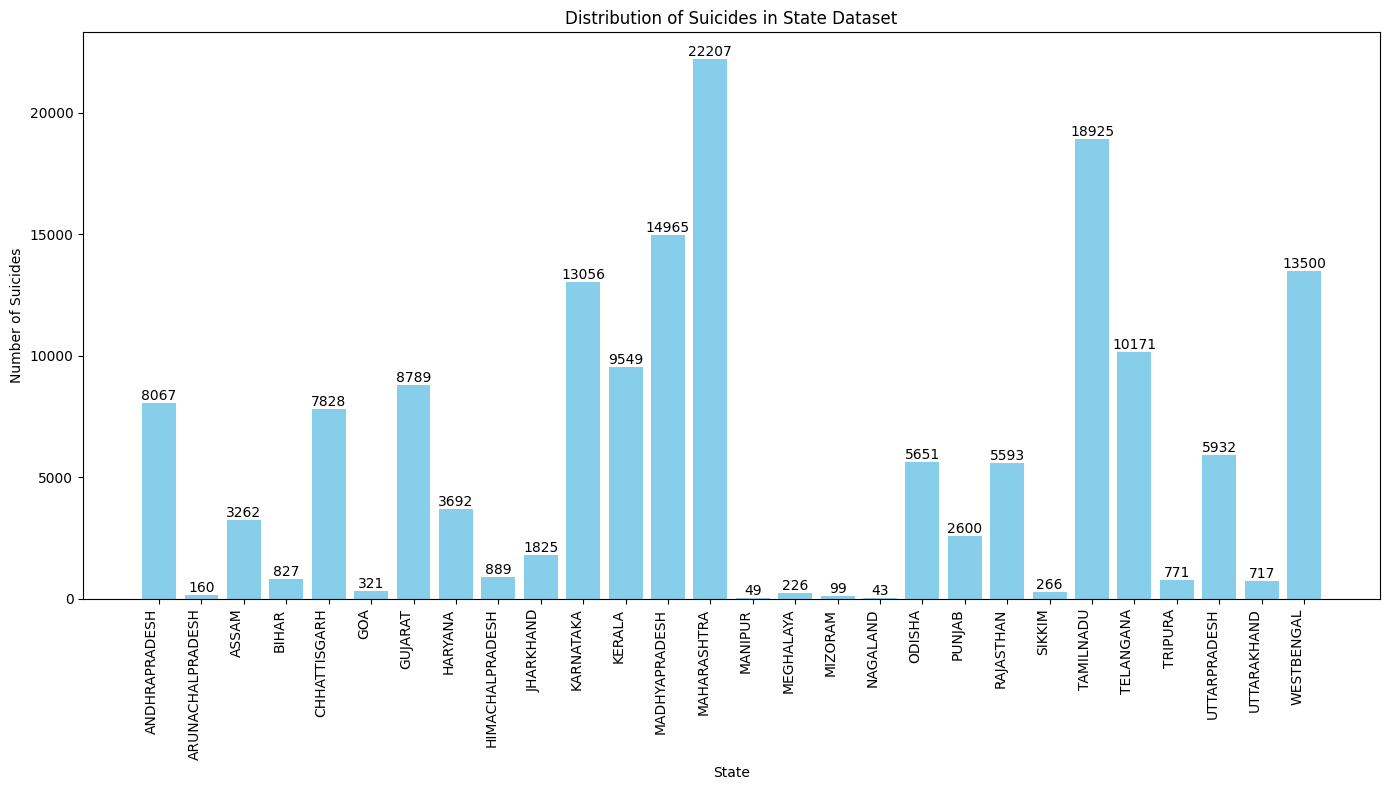

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of suicides in the 'state_df' dataset with numbers inside the bars
plt.figure(figsize=(14, 8))
bars = plt.bar(state_df['State'], state_df['Number of Suicides'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Suicides')
plt.title('Distribution of Suicides in State Dataset')
plt.xticks(rotation=90, ha='right')  # Rotate state names for better visibility

# Adding numbers inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


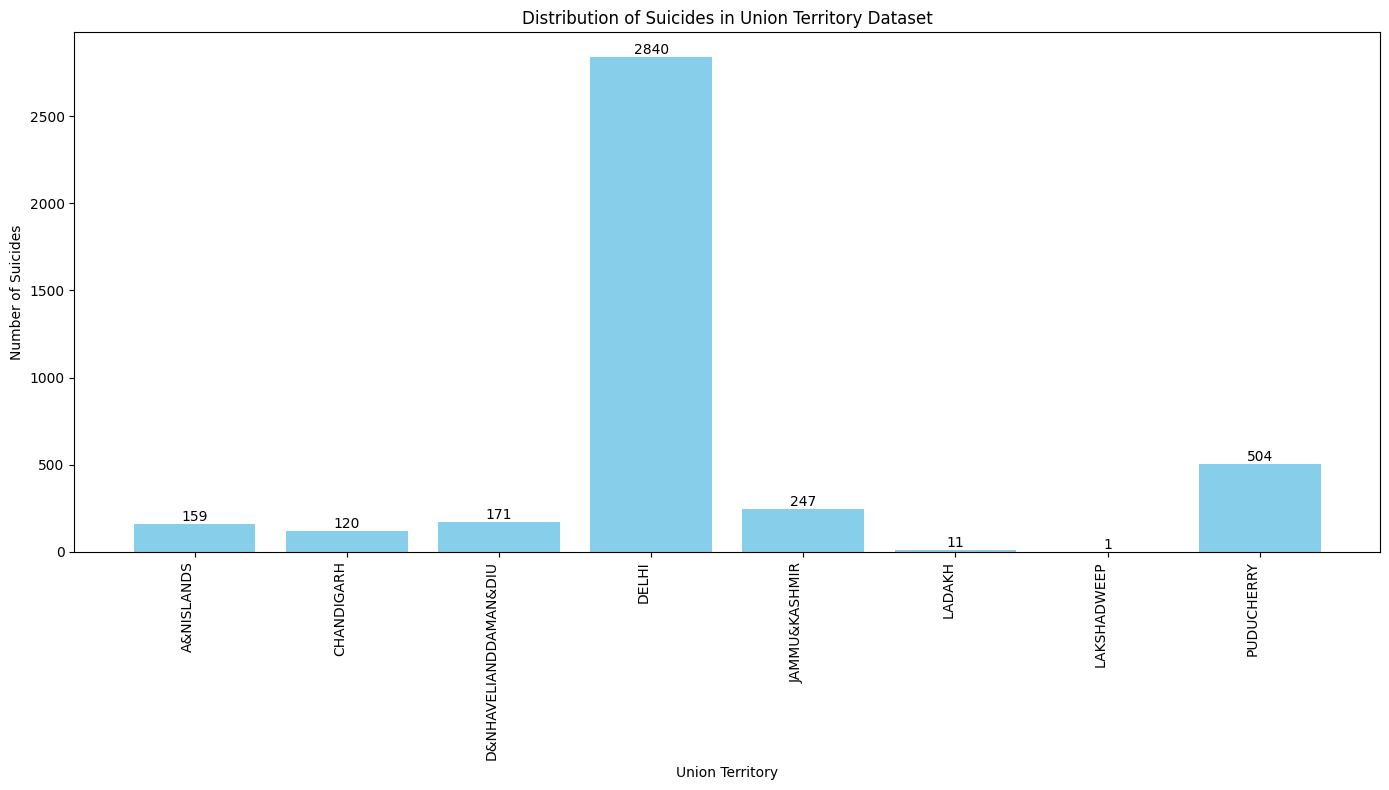

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of suicides in the 'ut_df' dataset with numbers inside the bars
plt.figure(figsize=(14, 8))
bars_ut = plt.bar(ut_df['Union Territory'], ut_df['Number of Suicides'], color='skyblue')
plt.xlabel('Union Territory')
plt.ylabel('Number of Suicides')
plt.title('Distribution of Suicides in Union Territory Dataset')
plt.xticks(rotation=90, ha='right')  # Rotate UT names for better visibility

# Adding numbers inside the bars
for bar_ut in bars_ut:
    yval_ut = bar_ut.get_height()
    plt.text(bar_ut.get_x() + bar_ut.get_width() / 2, yval_ut, int(yval_ut), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


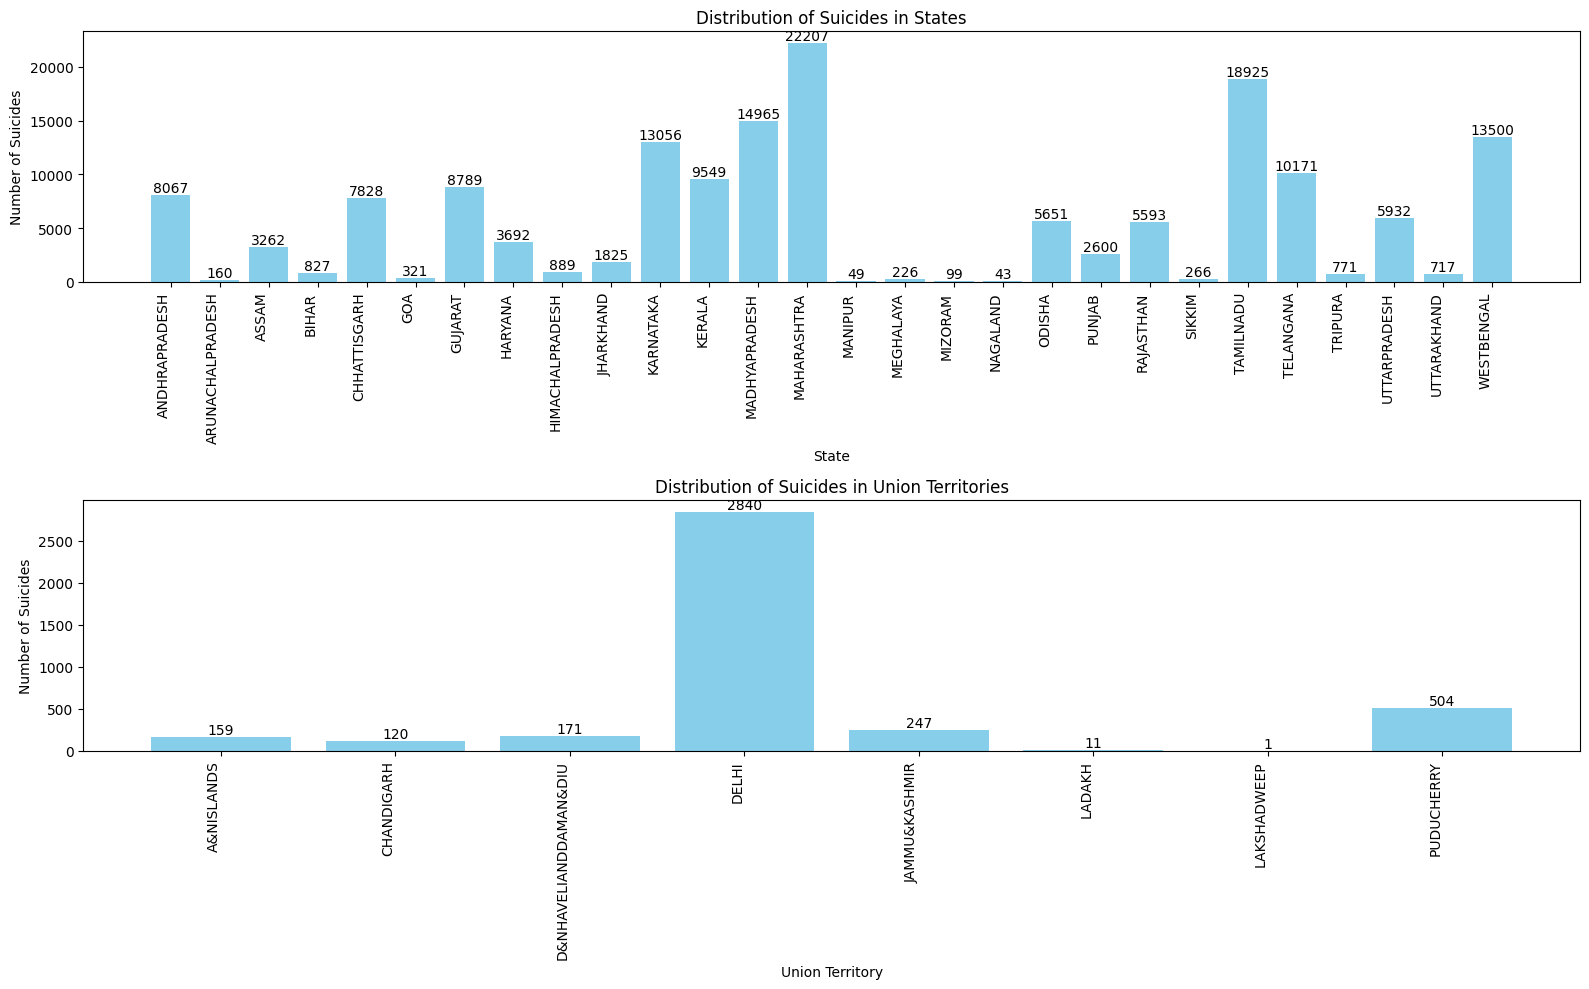

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have state_df and ut_df with data for states and union territories respectively

# Plotting the distribution of suicides in states
plt.figure(figsize=(16, 10))

# Subplot for states
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
bars = plt.bar(state_df['State'], state_df['Number of Suicides'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Suicides')
plt.title('Distribution of Suicides in States')
plt.xticks(rotation=90, ha='right')  # Rotate state names for better visibility

# Adding numbers inside the bars for states
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Subplot for union territories
plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
bars_ut = plt.bar(ut_df['Union Territory'], ut_df['Number of Suicides'], color='skyblue')
plt.xlabel('Union Territory')
plt.ylabel('Number of Suicides')
plt.title('Distribution of Suicides in Union Territories')
plt.xticks(rotation=90, ha='right')  # Rotate UT names for better visibility

# Adding numbers inside the bars for union territories
for bar_ut in bars_ut:
    yval_ut = bar_ut.get_height()
    plt.text(bar_ut.get_x() + bar_ut.get_width() / 2, yval_ut, int(yval_ut), ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the combined plot
plt.show()


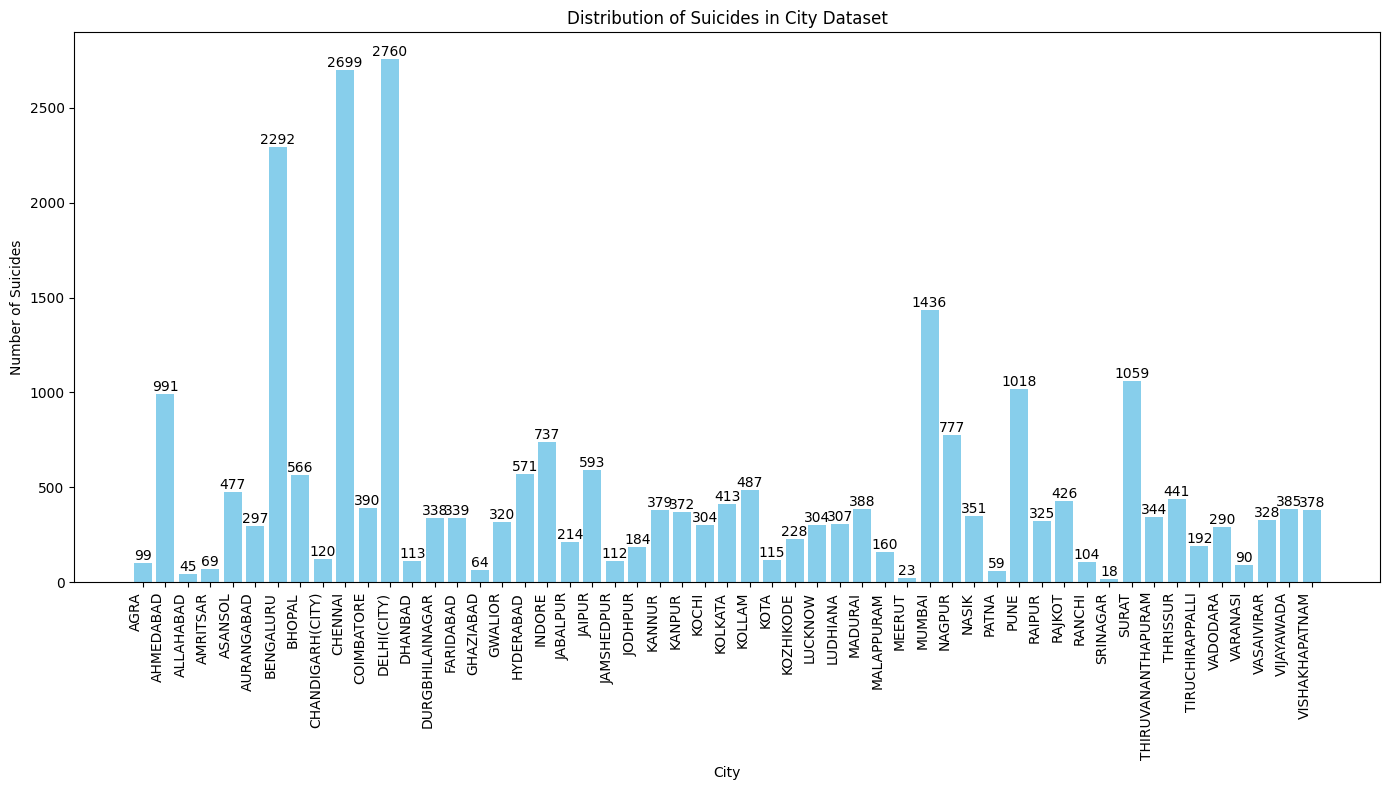

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of suicides in the 'city_df' dataset with numbers inside the bars
plt.figure(figsize=(14, 8))
bars_city = plt.bar(city_df['Cities'], city_df['Number of Suicides'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Suicides')
plt.title('Distribution of Suicides in City Dataset')
plt.xticks(rotation=90, ha='right')  # Rotate city names for better visibility

# Adding numbers inside the bars
for bar_city in bars_city:
    yval_city = bar_city.get_height()
    plt.text(bar_city.get_x() + bar_city.get_width() / 2, yval_city, int(yval_city), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


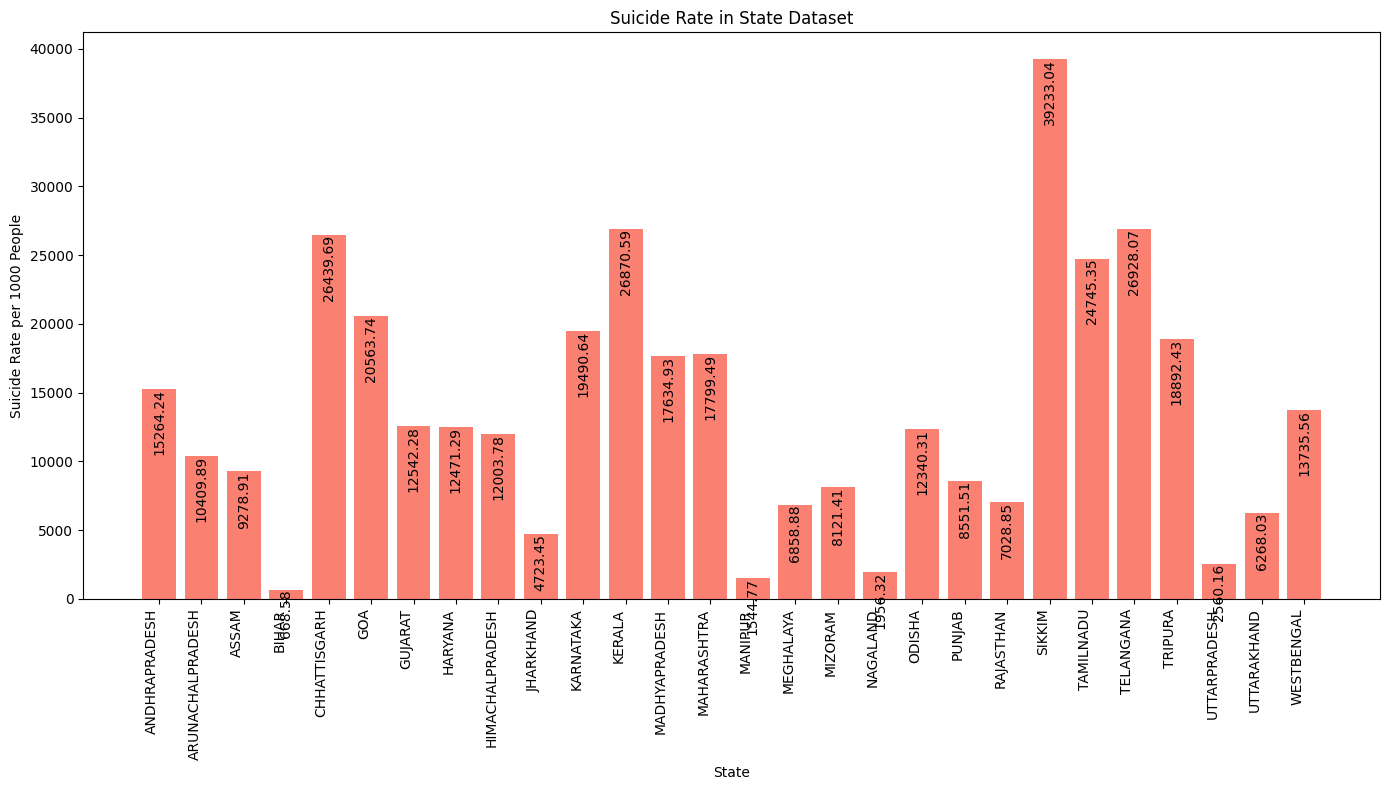

In [ ]:
import matplotlib.pyplot as plt

# Calculate suicide rate for State
state_df['Suicide Rate'] = (state_df['Number of Suicides'] / state_df['Projected mid-year population (in lakhs)']) * 1000

# Plotting the suicide rate in the 'state_df' dataset
plt.figure(figsize=(14, 8))
bars_state = plt.bar(state_df['State'], state_df['Suicide Rate'], color='salmon')
plt.xlabel('State')
plt.ylabel('Suicide Rate per 1000 People')
plt.title('Suicide Rate in State Dataset')
plt.xticks(rotation=90, ha='right')  # Rotate state names for better visibility

# Adding numbers inside the bars with vertical rotation
for bar_state in bars_state:
    xval_state = bar_state.get_x() + bar_state.get_width() / 2
    yval_state = bar_state.get_height()
    state_name = state_df.loc[state_df['Suicide Rate'] == yval_state, 'State'].iloc[0]

    # Adjust text position based on bar height
    va = 'top' if yval_state > 0 else 'bottom'
    y_position_state = yval_state + 0.02 if va == 'top' else yval_state - 0.02

    plt.text(xval_state, y_position_state, round(yval_state, 2), ha='center', va=va, rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

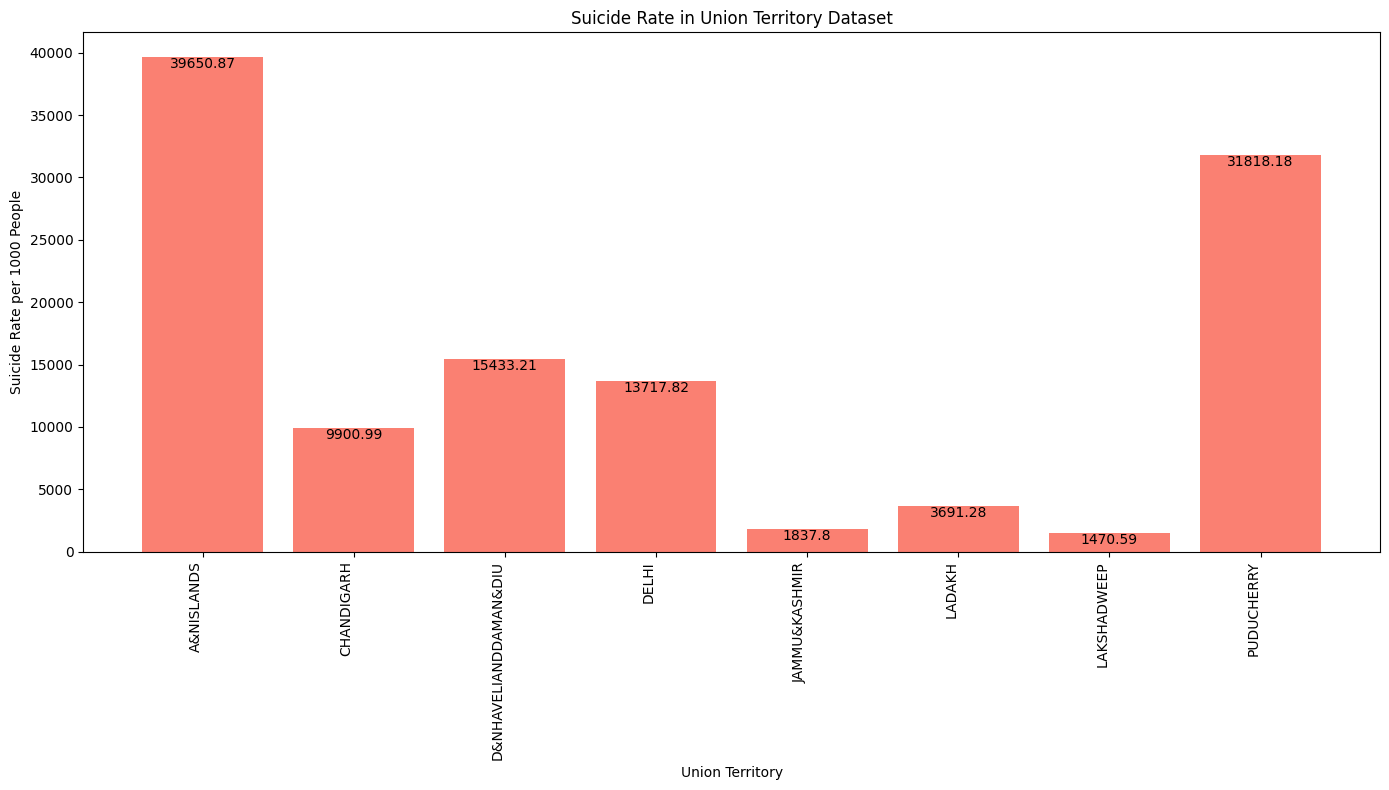

In [ ]:
import matplotlib.pyplot as plt

# Calculate suicide rate for Union Territory
ut_df['Suicide Rate'] = (ut_df['Number of Suicides'] / ut_df['Projected mid-year population (in lakhs)']) * 1000

# Plotting the suicide rate in the 'ut_df' dataset
plt.figure(figsize=(14, 8))
bars_ut = plt.bar(ut_df['Union Territory'], ut_df['Suicide Rate'], color='salmon')
plt.xlabel('Union Territory')
plt.ylabel('Suicide Rate per 1000 People')
plt.title('Suicide Rate in Union Territory Dataset')
plt.xticks(rotation=90, ha='right')  # Rotate UT names for better visibility

# Adding numbers inside the bars
for bar_ut in bars_ut:
    xval_ut = bar_ut.get_x() + bar_ut.get_width() / 2
    yval_ut = bar_ut.get_height()
    ut_name = ut_df.loc[ut_df['Suicide Rate'] == yval_ut, 'Union Territory'].iloc[0]

    # Adjust text position based on bar height
    va = 'top' if yval_ut > 0 else 'bottom'
    y_position_ut = yval_ut + 0.02 if va == 'top' else yval_ut - 0.02

    plt.text(xval_ut, y_position_ut, round(yval_ut, 2), ha='center', va=va)

# Display the plot
plt.tight_layout()
plt.show()

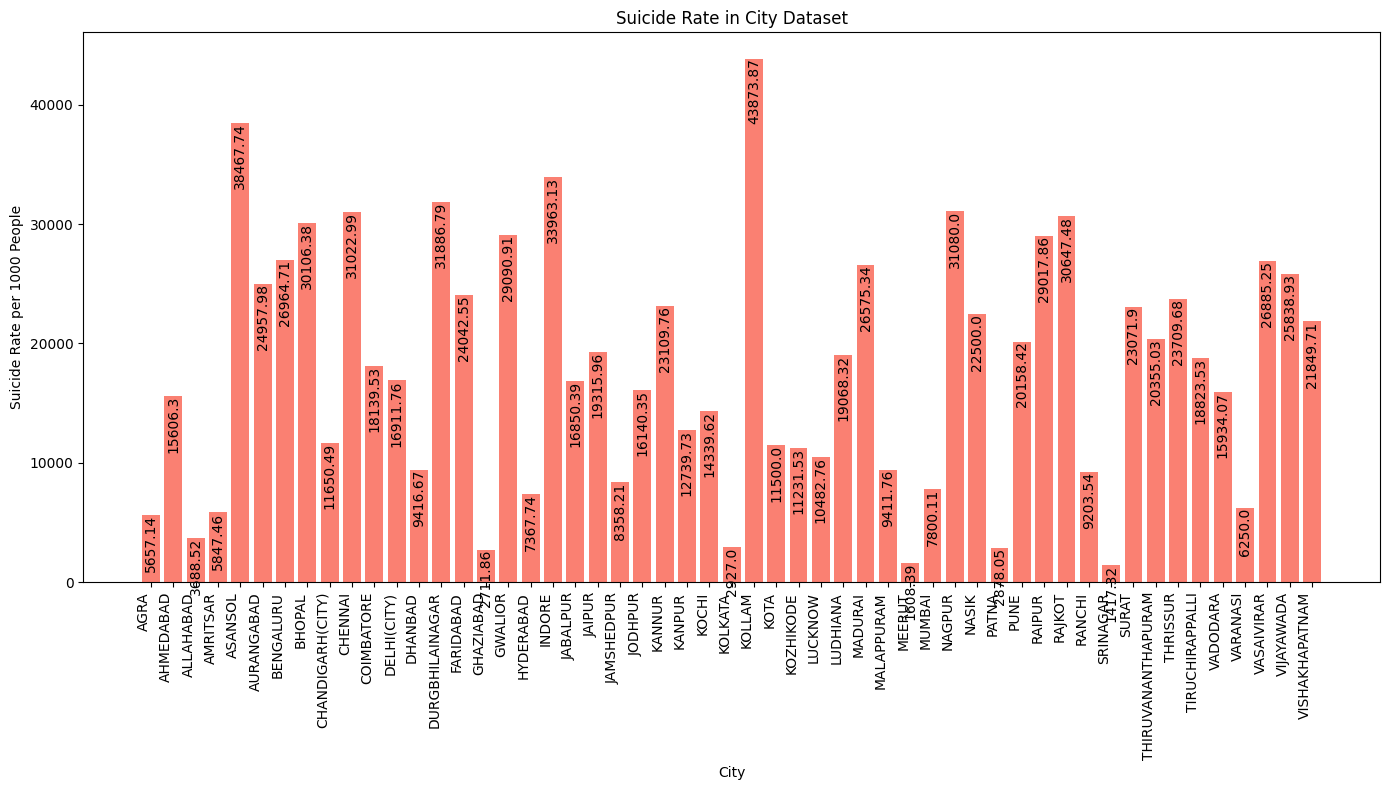

In [ ]:
import matplotlib.pyplot as plt

# Calculate suicide rate for City
city_df['Suicide Rate'] = (city_df['Number of Suicides'] / city_df['Projected mid-year population (in lakhs)']) * 1000

# Plotting the suicide rate in the 'city_df' dataset
plt.figure(figsize=(14, 8))
bars_city = plt.bar(city_df['Cities'], city_df['Suicide Rate'], color='salmon')
plt.xlabel('City')
plt.ylabel('Suicide Rate per 1000 People')
plt.title('Suicide Rate in City Dataset')
plt.xticks(rotation=90, ha='right')  # Rotate city names for better visibility

# Adding numbers inside the bars
for bar_city in bars_city:
    xval_city = bar_city.get_x() + bar_city.get_width() / 2
    yval_city = bar_city.get_height()
    city_name = city_df.loc[city_df['Suicide Rate'] == yval_city, 'Cities'].iloc[0]

    # Adjust text position based on bar height
    va = 'top' if yval_city > 0 else 'bottom'
    y_position = yval_city + 0.02 if va == 'top' else yval_city - 0.02

    # Rotate text vertically
    plt.text(xval_city, y_position, round(yval_city, 2), ha='center', va=va, rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


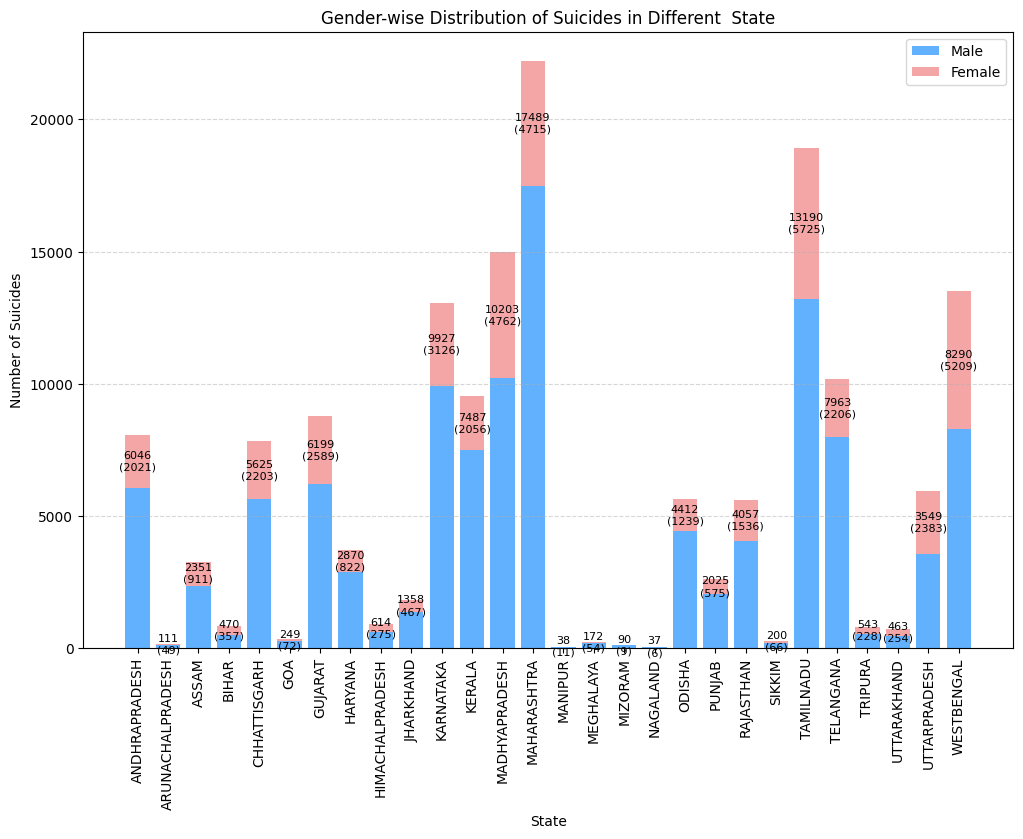

In [ ]:
import matplotlib.pyplot as plt

# Grouping data by state and summing male and female suicides
state_gender_suicides = state_df.groupby('State')[['Male', 'Female']].sum()

# Plotting the data with different colors
bar_positions = range(len(state_gender_suicides))
bar_male = state_gender_suicides['Male'].values
bar_female = state_gender_suicides['Female'].values

plt.figure(figsize=(12, 8))
plt.bar(bar_positions, bar_male, label='Male', color='dodgerblue', alpha=0.7)
plt.bar(bar_positions, bar_female, bottom=bar_male, label='Female', color='lightcoral', alpha=0.7)

# Adding numbers on top of the bars with improved visibility
for pos, male, female in zip(bar_positions, bar_male, bar_female):
    plt.text(pos, male + female / 2, f"{int(male)}\n({int(female)})", ha='center', va='center', color='black', fontsize=8)

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Number of Suicides')
plt.title('Gender-wise Distribution of Suicides in Different  State')
plt.xticks(bar_positions, state_gender_suicides.index, rotation='vertical')  # Set rotation to 'vertical'
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


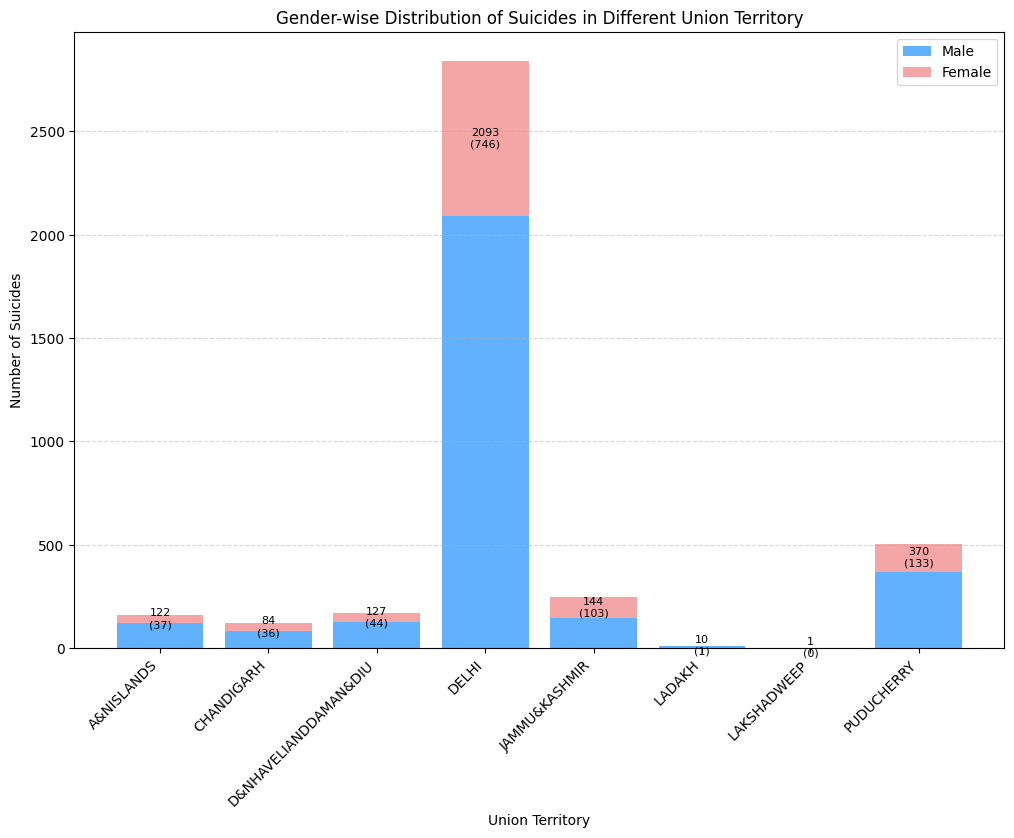

In [ ]:
import matplotlib.pyplot as plt

# Grouping data by Union Territory and summing male and female suicides
ut_gender_suicides = ut_df.groupby('Union Territory')[['Male', 'Female']].sum()

# Plotting the data with different colors
bar_positions = range(len(ut_gender_suicides))
bar_male = ut_gender_suicides['Male'].values
bar_female = ut_gender_suicides['Female'].values

plt.figure(figsize=(12, 8))
plt.bar(bar_positions, bar_male, label='Male', color='dodgerblue', alpha=0.7)
plt.bar(bar_positions, bar_female, bottom=bar_male, label='Female', color='lightcoral', alpha=0.7)

# Adding numbers on top of the bars with improved visibility
for pos, male, female in zip(bar_positions, bar_male, bar_female):
    plt.text(pos, male + female / 2, f"{int(male)}\n({int(female)})", ha='center', va='center', color='black', fontsize=8)

# Adding labels and title
plt.xlabel('Union Territory')
plt.ylabel('Number of Suicides')
plt.title('Gender-wise Distribution of Suicides in Different Union Territory')
plt.xticks(bar_positions, ut_gender_suicides.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


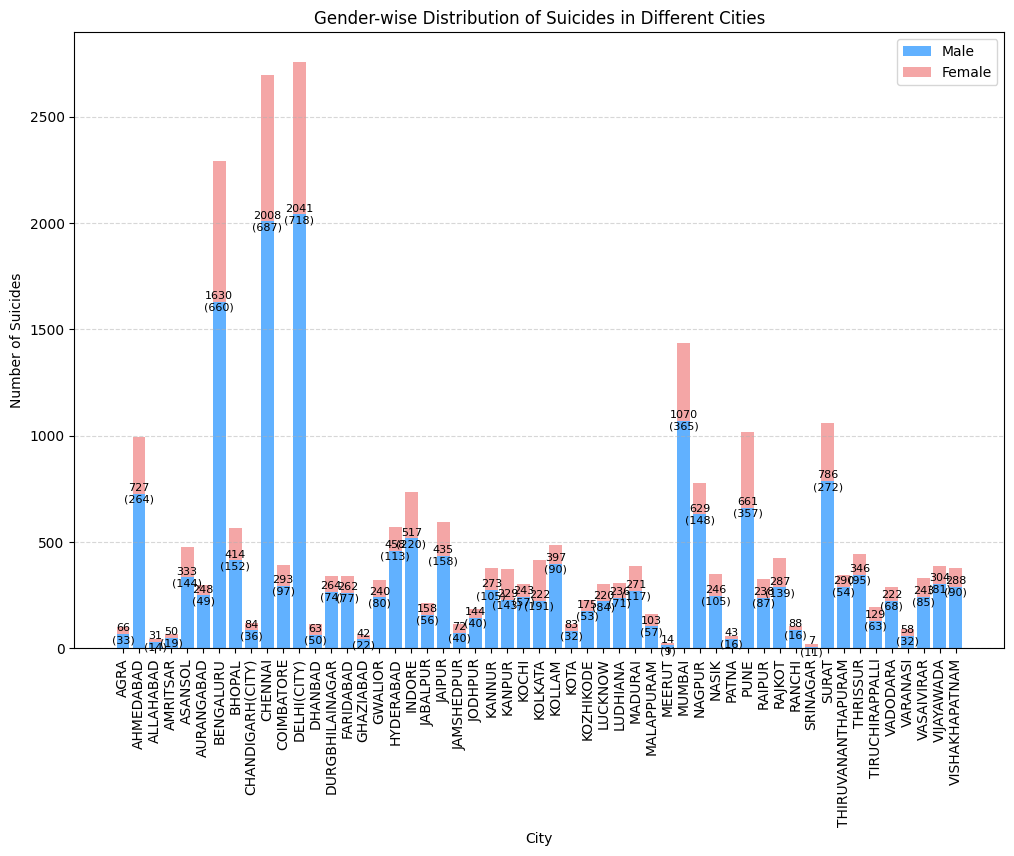

In [ ]:
import matplotlib.pyplot as plt

# Grouping data by city and summing male and female suicides
city_gender_suicides = city_df.groupby('Cities')[['Male', 'Female']].sum()

# Plotting the data with different colors
bar_positions = range(len(city_gender_suicides))
bar_male = city_gender_suicides['Male'].values
bar_female = city_gender_suicides['Female'].values

plt.figure(figsize=(12, 8))
bars_male = plt.bar(bar_positions, bar_male, label='Male', color='dodgerblue', alpha=0.7)
bars_female = plt.bar(bar_positions, bar_female, bottom=bar_male, label='Female', color='lightcoral', alpha=0.7)

# Adding numbers on top of the bars with improved visibility
for bar, male, female, city_name in zip(bars_male, bar_male, bar_female, city_gender_suicides.index):
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_y() + bar.get_height()
    plt.text(xval, yval, f"{int(male)}\n({int(female)})", ha='center', va='center', color='black', fontsize=8)

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Number of Suicides')
plt.title('Gender-wise Distribution of Suicides in Different Cities')

# Rotate city names vertically
plt.xticks(bar_positions, city_gender_suicides.index, rotation=90, ha='center')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Display original and predicted total suicides for states
state_predictions = pd.DataFrame({
    'State': state_df['State'],
    '2021 Original': state_df['2021 Total'],
    '2024 Predicted': model_state.predict(state_df[['2021 Total']].values.reshape(-1, 1))
})

print("\nOriginal and Predicted Total Suicides for States:")
print(state_predictions)




Original and Predicted Total Suicides for States:
               State  2021 Original  2024 Predicted
0      ANDHRAPRADESH           7043     7629.588278
1   ARUNACHALPRADESH            160        0.450820
2              ASSAM           3243     3417.657094
3              BIHAR            809      719.804330
4       CHHATTISGARH           7710     8368.893042
5                GOA            308      164.494455
6            GUJARAT           8050     8745.750042
7            HARYANA           4001     4257.826525
8    HIMACHALPRADESH            857      773.007671
9          JHARKHAND           2145     2200.630662
10         KARNATAKA          12259    13411.018031
11            KERALA           8500     9244.531367
12     MADHYAPRADESH          14578    15981.404456
13       MAHARASHTRA          19909    21890.300547
14           MANIPUR             44     -128.123922
15         MEGHALAYA            224       71.388608
16           MIZORAM            108      -57.186133
17          N

In [ ]:
# Display original and predicted total suicides for Union Territories with Sl. starting from 1
ut_predictions = pd.DataFrame({
    'Union Territory': ut_df['Union Territory'],
    '2021 Original': ut_df['2021 Total'],
    '2024 Predicted': ut_model.predict(ut_df[['2021 Total']].values.reshape(-1, 1))
})

# Add 'Sl.' column starting from 1
ut_predictions.insert(0, 'Sl.', range(1, len(ut_predictions) + 1))

# Set 'Sl.' as the index
ut_predictions.set_index('Sl.', inplace=True)

print("\nOriginal and Predicted Total Suicides for Union Territories:")
print(ut_predictions)



Original and Predicted Total Suicides for Union Territories:
           Union Territory  2021 Original  2024 Predicted
Sl.                                                      
1               A&NISLANDS            180      182.989768
2               CHANDIGARH            128      136.161157
3    D&NHAVELIANDDAMAN&DIU            156      161.376563
4                    DELHI           3142     2850.419494
5            JAMMU&KASHMIR            287      279.348640
6                   LADAKH             12       31.697332
7              LAKSHADWEEP              2       22.691830
8               PUDUCHERRY            408      388.315216


In [ ]:
# Display original and predicted total suicides for cities with Sl. as the index
city_predictions = pd.DataFrame({
    'Sl.': range(1, len(city_df) + 1),
    'City': city_df['Cities'].str.replace(r'\(.*\)', '', regex=True),  # Remove anything within parentheses
    '2021 Original': city_df['2021 Total'],
    '2024 Predicted': city_model.predict(city_df[['2021 Total']].values.reshape(-1, 1))
}).set_index('Sl.')

print("\nOriginal and Predicted Total Suicides for Cities:")
print(city_predictions)



Original and Predicted Total Suicides for Cities:
                   City  2021 Original  2024 Predicted
Sl.                                                   
1                  AGRA            115      148.377153
2             AHMEDABAD            871      915.743157
3             ALLAHABAD             40       72.249573
4              AMRITSAR             97      130.106534
5               ASANSOL            329      365.594514
6            AURANGABAD            270      305.707485
7             BENGALURU           2196     2260.663733
8                BHOPAL            416      453.902507
9            CHANDIGARH            128      161.572600
10              CHENNAI           2430     2498.181781
11           COIMBATORE            443      481.308435
12                DELHI           3025     3102.127247
13              DHANBAD            124      157.512463
14      DURGBHILAINAGAR            325      361.534376
15            FARIDABAD            312      348.338929
16            

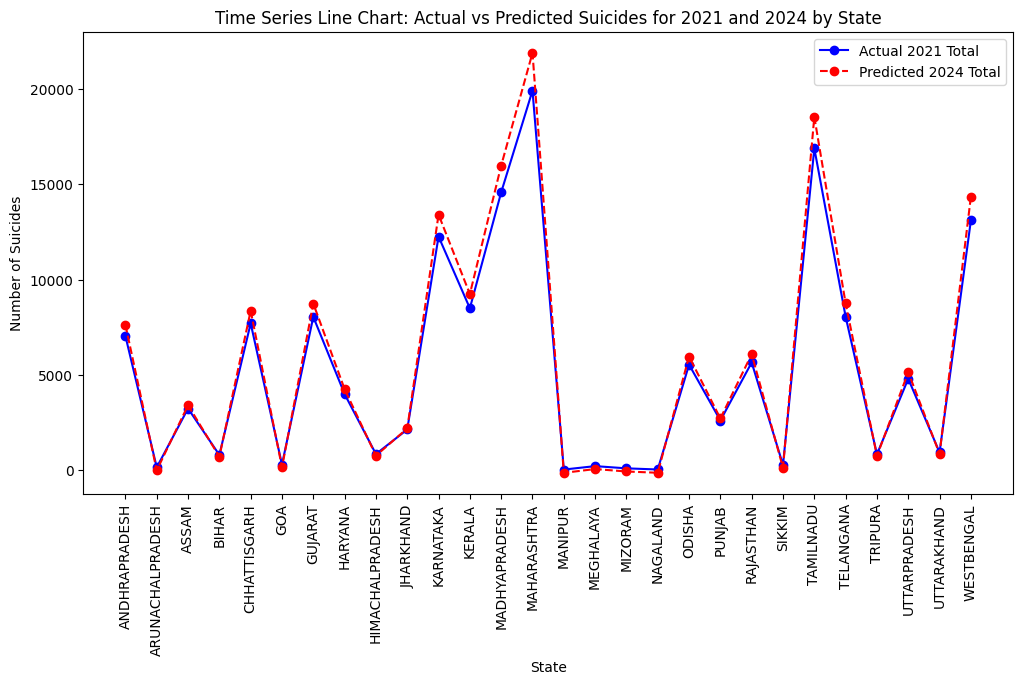

In [ ]:
# Time Series Line Chart: Actual vs Predicted Suicides by State
plt.figure(figsize=(12, 6))
plt.plot(state_df.index, state_df['2021 Total'], label='Actual 2021 Total', marker='o', color='blue')
plt.plot(state_df.index, state_df['2024 Predicted'], label='Predicted 2024 Total', linestyle='dashed', marker='o', color='red')
plt.title("Time Series Line Chart: Actual vs Predicted Suicides for 2021 and 2024 by State")
plt.xlabel("State")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=90)
plt.legend()
plt.show()


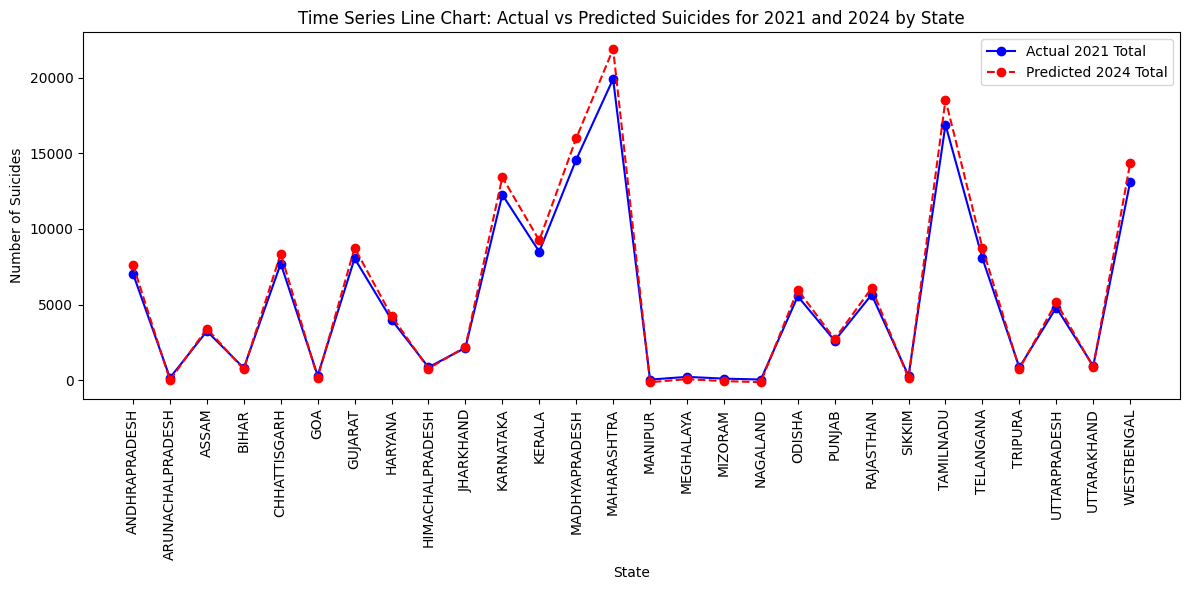

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the given DataFrame
states = [
    "ANDHRAPRADESH", "ARUNACHALPRADESH", "ASSAM", "BIHAR", "CHHATTISGARH",
    "GOA", "GUJARAT", "HARYANA", "HIMACHALPRADESH", "JHARKHAND",
    "KARNATAKA", "KERALA", "MADHYAPRADESH", "MAHARASHTRA", "MANIPUR",
    "MEGHALAYA", "MIZORAM", "NAGALAND", "ODISHA", "PUNJAB", "RAJASTHAN",
    "SIKKIM", "TAMILNADU", "TELANGANA", "TRIPURA", "UTTARPRADESH",
    "UTTARAKHAND", "WESTBENGAL"
]
actual_2021 = [
    7043, 160, 3243, 809, 7710, 308, 8050, 4001, 857, 2145,
    12259, 8500, 14578, 19909, 44, 224, 108, 48, 5546, 2616,
    5658, 285, 16883, 8058, 845, 4804, 943, 13103
]
predicted_2024 = [
    7629.588278, 0.450820, 3417.657094, 719.804330, 8368.893042,
    164.494455, 8745.750042, 4257.826525, 773.007671, 2200.630662,
    13411.018031, 9244.531367, 15981.404456, 21890.300547, -128.123922,
    71.388608, -57.186133, -123.690310, 5970.309072, 2722.688448,
    6094.450202, 139.001188, 18536.273241, 8754.617266, 759.706836,
    5147.874088, 868.330324, 14346.510115
]

# Plotting the time series line chart
plt.figure(figsize=(12, 6))
plt.plot(states, actual_2021, label='Actual 2021 Total', marker='o', color='blue')
plt.plot(states, predicted_2024, label='Predicted 2024 Total', linestyle='dashed', marker='o', color='red')
plt.title("Time Series Line Chart: Actual vs Predicted Suicides for 2021 and 2024 by State")
plt.xlabel("State")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


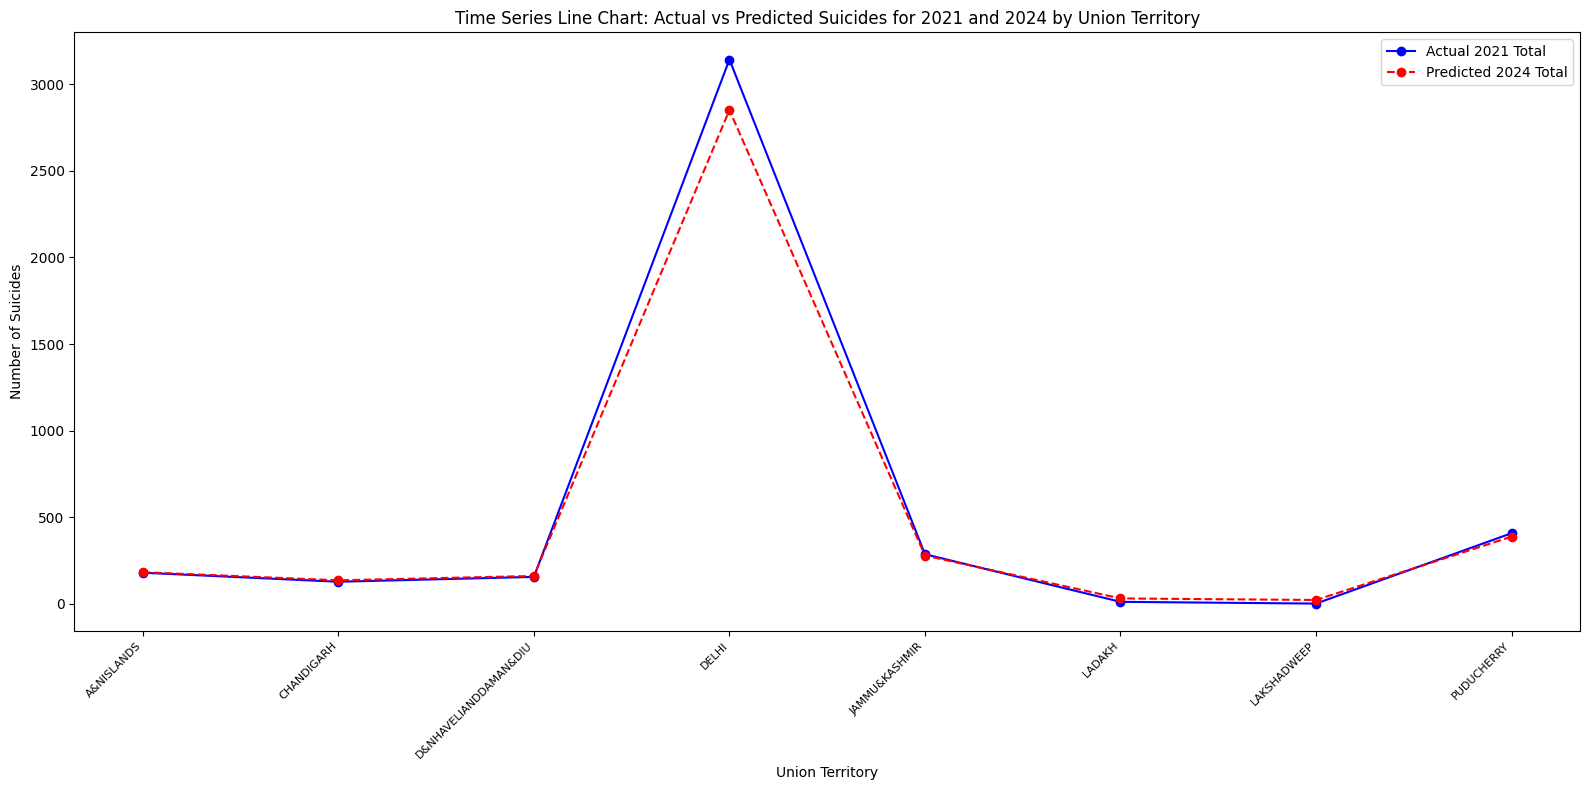

In [ ]:
# Time Series Line Chart: Actual vs Predicted Suicides by Union Territory
plt.figure(figsize=(16, 8))  # Increase figure size
plt.plot(ut_predictions['Union Territory'], ut_predictions['2021 Original'], label='Actual 2021 Total', marker='o', color='blue')
plt.plot(ut_predictions['Union Territory'], ut_predictions['2024 Predicted'], label='Predicted 2024 Total', linestyle='dashed', marker='o', color='red')
plt.title("Time Series Line Chart: Actual vs Predicted Suicides for 2021 and 2024 by Union Territory")
plt.xlabel("Union Territory")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=45, ha='right', fontsize=8)  # Adjust rotation and fontsize
plt.legend()
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


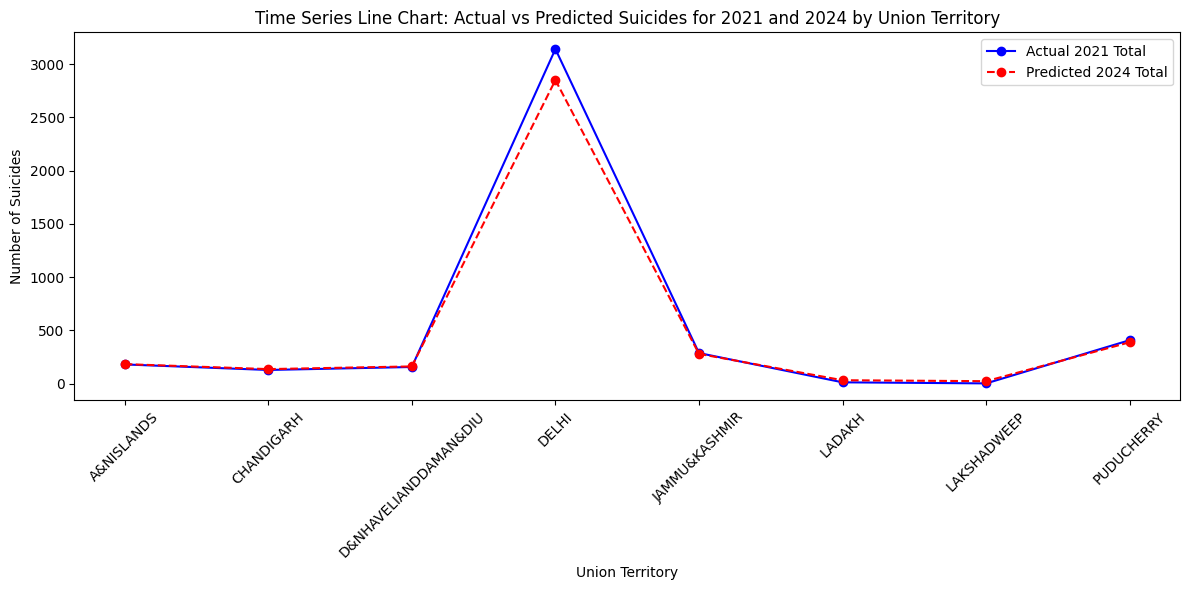

In [ ]:
import matplotlib.pyplot as plt

# Extracting data
uts = [
    "A&NISLANDS", "CHANDIGARH", "D&NHAVELIANDDAMAN&DIU",
    "DELHI", "JAMMU&KASHMIR", "LADAKH", "LAKSHADWEEP", "PUDUCHERRY"
]
actual_2021 = [180, 128, 156, 3142, 287, 12, 2, 408]
predicted_2024 = [182.989768, 136.161157, 161.376563, 2850.419494, 279.348640, 31.697332, 22.691830, 388.315216]

# Plotting the time series line chart
plt.figure(figsize=(12, 6))
plt.plot(uts, actual_2021, label='Actual 2021 Total', marker='o', color='blue')
plt.plot(uts, predicted_2024, label='Predicted 2024 Total', linestyle='dashed', marker='o', color='red')
plt.title("Time Series Line Chart: Actual vs Predicted Suicides for 2021 and 2024 by Union Territory")
plt.xlabel("Union Territory")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


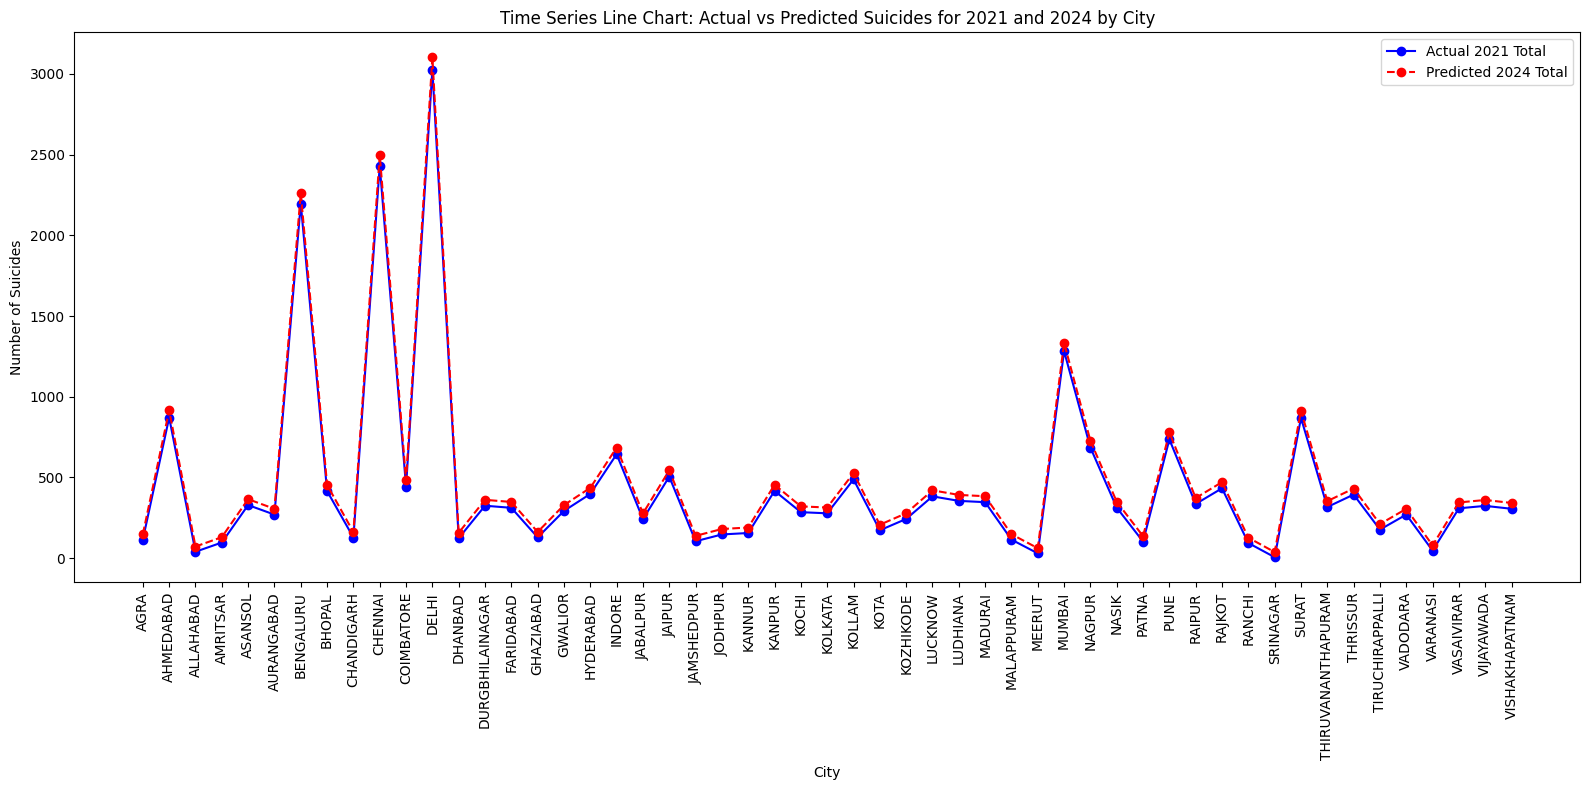

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named city_predictions with columns 'City', '2021 Original', and '2024 Predicted'
# Remove "(CITY)" from the city names
city_predictions['City'] = city_predictions['City'].str.replace(r'\(.*\)', '', regex=True)

# Plotting the time series line chart
plt.figure(figsize=(16, 8))
plt.plot(city_predictions['City'], city_predictions['2021 Original'], label='Actual 2021 Total', marker='o', color='blue')
plt.plot(city_predictions['City'], city_predictions['2024 Predicted'], label='Predicted 2024 Total', linestyle='dashed', marker='o', color='red')

# Setting chart properties
plt.title("Time Series Line Chart: Actual vs Predicted Suicides for 2021 and 2024 by City")
plt.xlabel("City")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=90, ha='center')  # Rotate city names vertically
plt.legend()
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


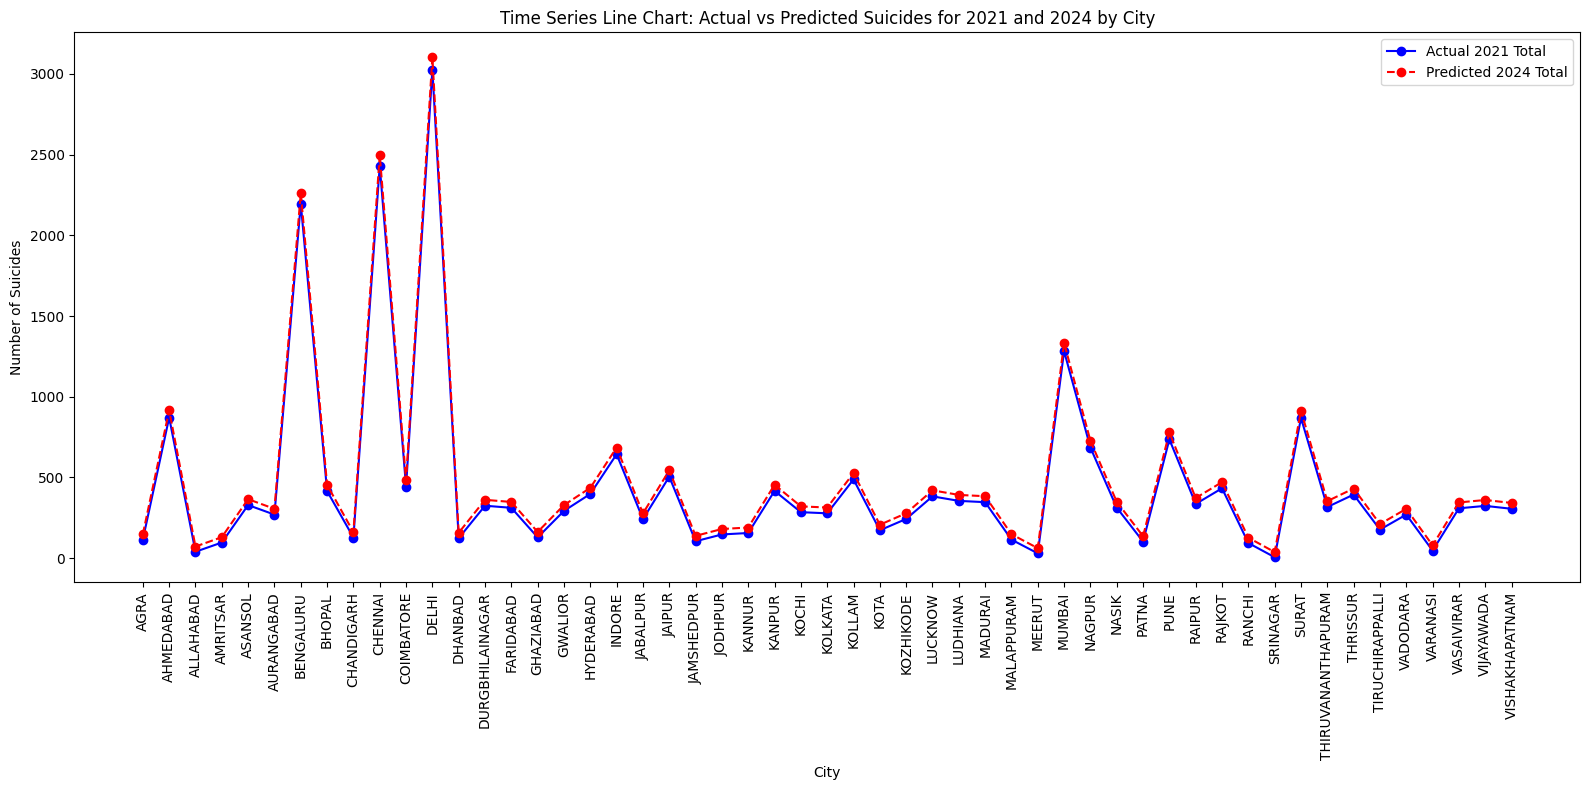

In [ ]:
import matplotlib.pyplot as plt

# "Data is provided manually because predicted values are not included in the dataset table; errors in the graph code may occur as a result."
cities_data = {
    'City': ['AGRA', 'AHMEDABAD', 'ALLAHABAD', 'AMRITSAR', 'ASANSOL', 'AURANGABAD', 'BENGALURU', 'BHOPAL', 'CHANDIGARH',
             'CHENNAI', 'COIMBATORE', 'DELHI', 'DHANBAD', 'DURGBHILAINAGAR', 'FARIDABAD', 'GHAZIABAD', 'GWALIOR',
             'HYDERABAD', 'INDORE', 'JABALPUR', 'JAIPUR', 'JAMSHEDPUR', 'JODHPUR', 'KANNUR', 'KANPUR', 'KOCHI', 'KOLKATA',
             'KOLLAM', 'KOTA', 'KOZHIKODE', 'LUCKNOW', 'LUDHIANA', 'MADURAI', 'MALAPPURAM', 'MEERUT', 'MUMBAI', 'NAGPUR',
             'NASIK', 'PATNA', 'PUNE', 'RAIPUR', 'RAJKOT', 'RANCHI', 'SRINAGAR', 'SURAT', 'THIRUVANANTHAPURAM', 'THRISSUR',
             'TIRUCHIRAPPALLI', 'VADODARA', 'VARANASI', 'VASAIVIRAR', 'VIJAYAWADA', 'VISHAKHAPATNAM'],
    '2021 Original': [115, 871, 40, 97, 329, 270, 2196, 416, 128, 2430, 443, 3025, 124, 325, 312, 129, 293, 398, 644,
                      242, 505, 105, 147, 156, 417, 285, 278, 488, 173, 243, 383, 355, 347, 115, 30, 1282, 685, 313, 103,
                      736, 336, 433, 94, 6, 869, 317, 394, 177, 270, 47, 309, 324, 306],
    '2024 Predicted': [148.377153, 915.743157, 72.249573, 130.106534, 365.594514, 305.707485, 2260.663733, 453.902507,
                        161.5726, 2498.181781, 481.308435, 3102.127247, 157.512463, 361.534376, 348.338929, 162.587635,
                        329.053276, 435.631887, 685.330349, 277.286521, 544.240568, 138.226809, 180.858254, 189.993563,
                        454.917541, 320.933001, 313.82776, 526.984983, 207.249148, 278.301556, 420.406371, 391.985408,
                        383.865133, 148.377153, 62.099229, 1332.922294, 726.946759, 349.353964, 136.19674, 778.713513,
                        372.699755, 471.158091, 127.061431, 37.738404, 913.713088, 353.414101, 431.57175, 211.309286,
                        305.707485, 79.354814, 345.293826, 360.519342, 342.248723]
}

# Create DataFrame
city_df = pd.DataFrame(cities_data)

# Plotting the time series line chart
plt.figure(figsize=(16, 8))
plt.plot(city_df['City'], city_df['2021 Original'], label='Actual 2021 Total', marker='o', color='blue')
plt.plot(city_df['City'], city_df['2024 Predicted'], label='Predicted 2024 Total', linestyle='dashed', marker='o', color='red')

# Setting chart properties
plt.title("Time Series Line Chart: Actual vs Predicted Suicides for 2021 and 2024 by City")
plt.xlabel("City")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=90, ha='center')  # Rotate city names vertically
plt.legend()
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


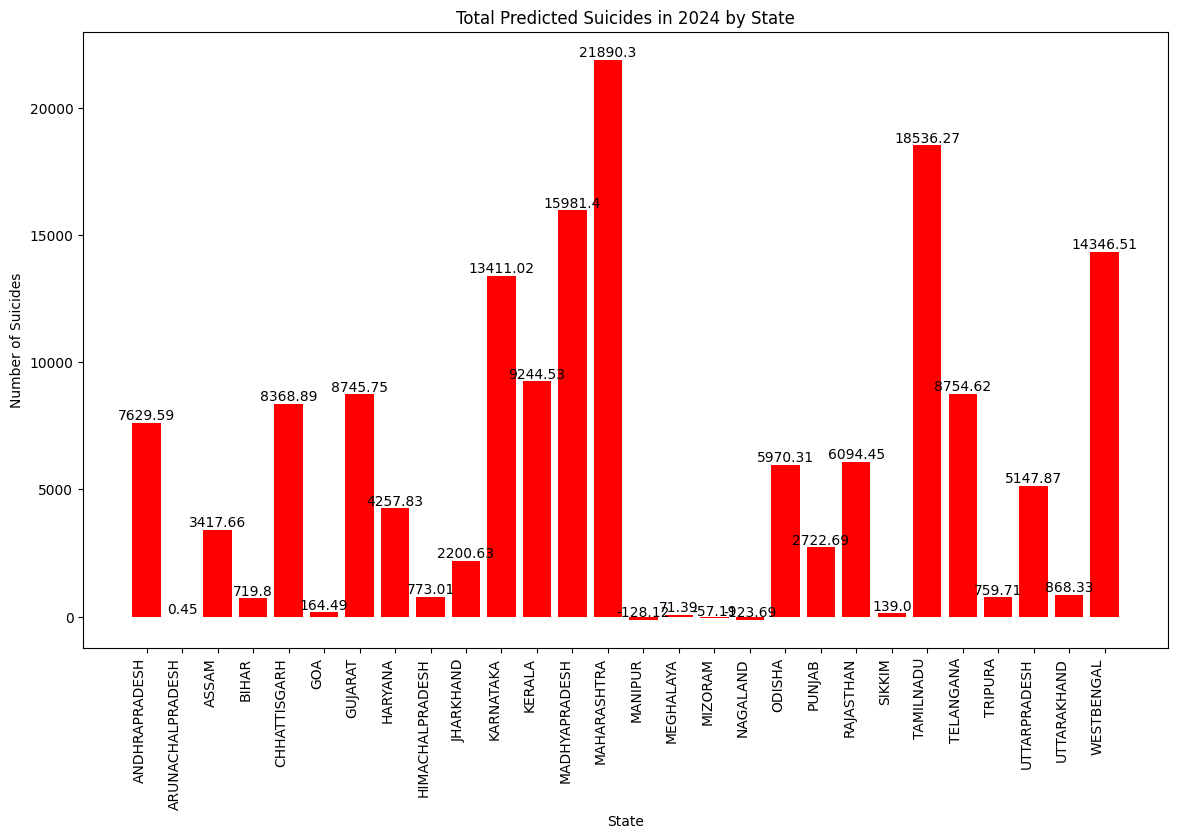

In [ ]:
# Bar graph for total predicted suicides in 2024 by state
plt.figure(figsize=(14, 8))
bars = plt.bar(state_df.index, state_df['2024 Predicted'], color='red')  # Change the color to red
plt.title('Total Predicted Suicides in 2024 by State')
plt.xlabel('State')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90, ha='right')  # Rotate state names for better visibility

# Adding numbers inside the bars
for bar in bars:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, str(round(yval, 2)), ha='center', va='bottom')

plt.show()


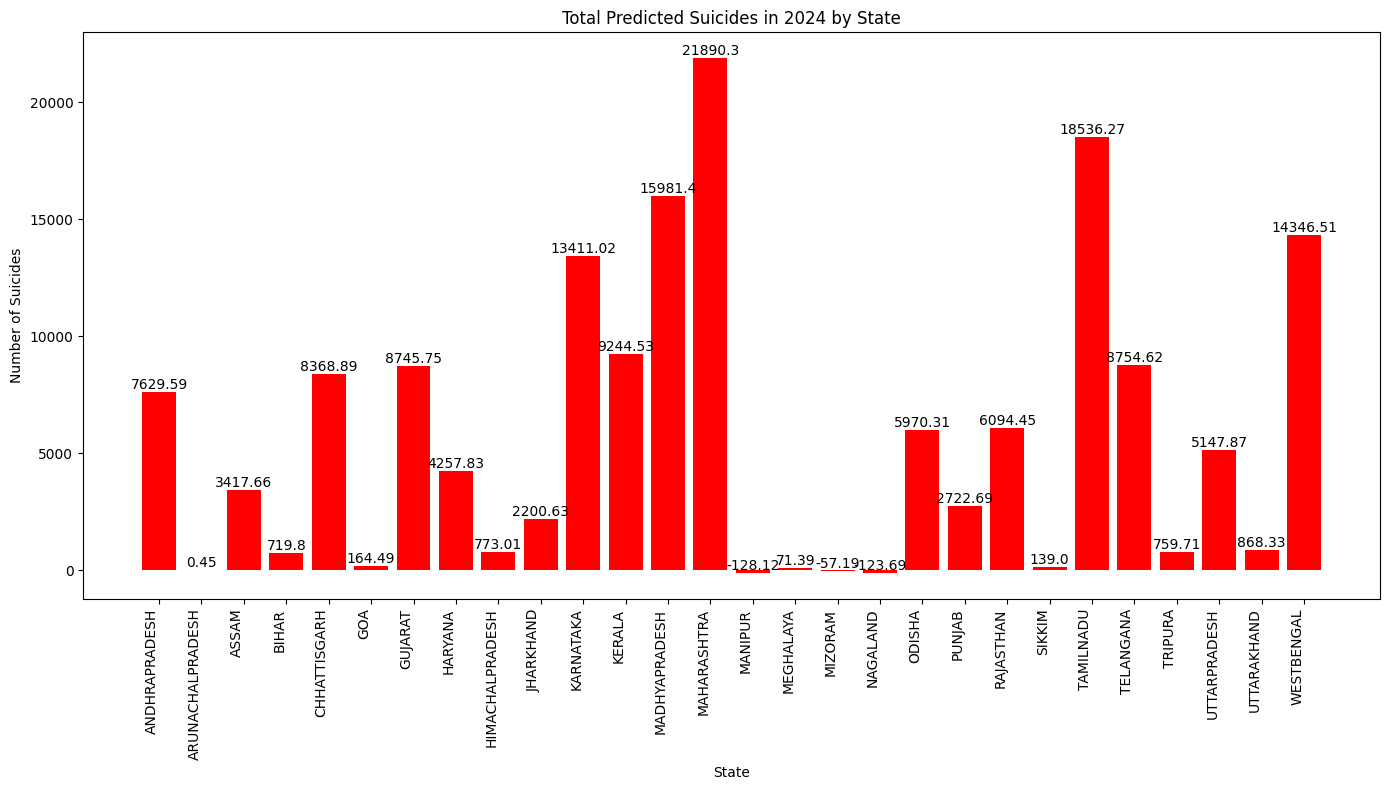

In [ ]:
import matplotlib.pyplot as plt
#"Data is provided manually because predicted values are not included in the dataset table; errors in the graph code may occur as a result."
state_data = {
    'State': ['ANDHRAPRADESH', 'ARUNACHALPRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA',
              'HIMACHALPRADESH', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYAPRADESH', 'MAHARASHTRA', 'MANIPUR',
              'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMILNADU',
              'TELANGANA', 'TRIPURA', 'UTTARPRADESH', 'UTTARAKHAND', 'WESTBENGAL'],
    '2024 Predicted': [7629.588278, 0.45082, 3417.657094, 719.80433, 8368.893042, 164.494455, 8745.750042,
                       4257.826525, 773.007671, 2200.630662, 13411.018031, 9244.531367, 15981.404456, 21890.300547,
                       -128.123922, 71.388608, -57.186133, -123.69031, 5970.309072, 2722.688448, 6094.450202,
                       139.001188, 18536.273241, 8754.617266, 759.706836, 5147.874088, 868.330324, 14346.510115]
}

# Create DataFrame
state_df = pd.DataFrame(state_data)

# Plotting the bar graph
plt.figure(figsize=(14, 8))
bars = plt.bar(state_df['State'], state_df['2024 Predicted'], color='red')  # Change the color to red
plt.title('Total Predicted Suicides in 2024 by State')
plt.xlabel('State')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90, ha='right')  # Rotate state names for better visibility

# Adding numbers inside the bars
for bar in bars:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, str(round(yval, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


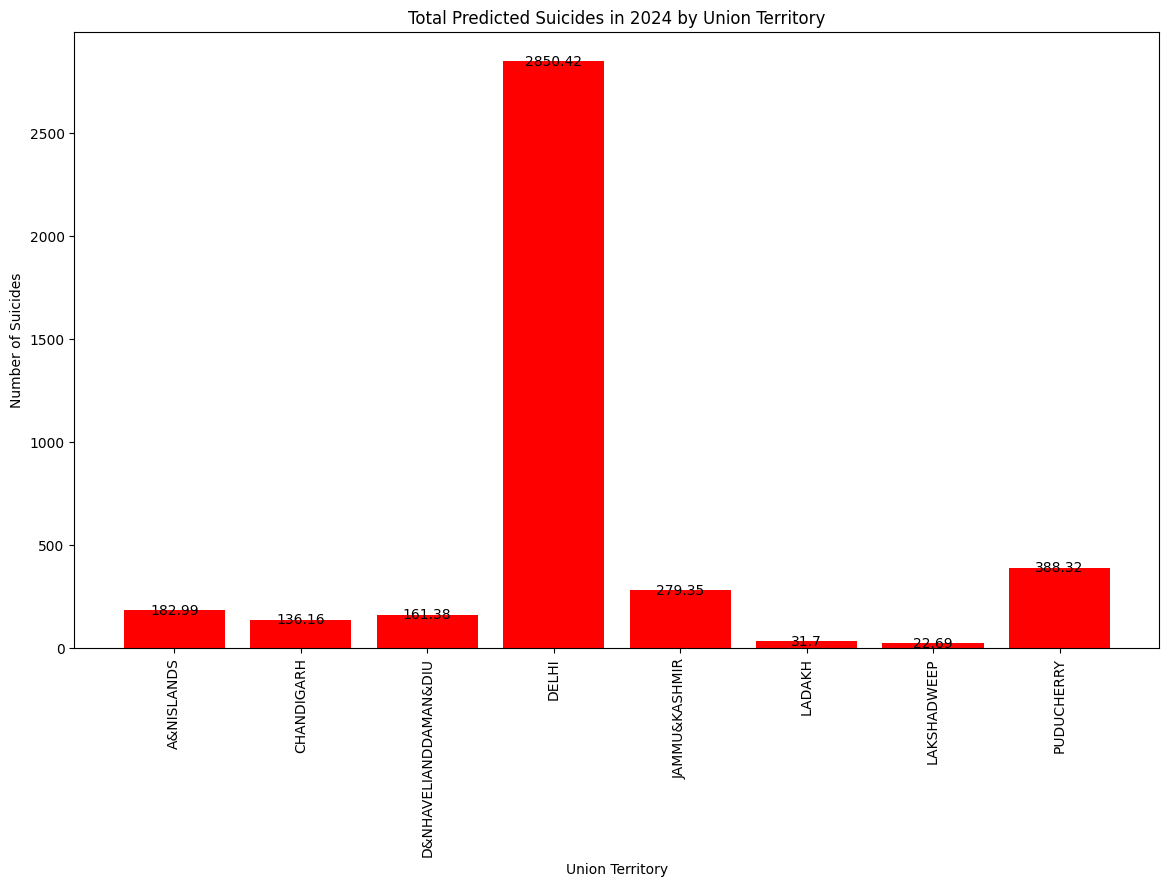

In [ ]:
# Bar graph for total predicted suicides in 2024 by Union Territory
plt.figure(figsize=(14, 8))
bars_ut = plt.bar(ut_predictions['Union Territory'], ut_predictions['2024 Predicted'], color='red')  # Change the color to red
plt.title('Total Predicted Suicides in 2024 by Union Territory')
plt.xlabel('Union Territory')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90, ha='right')  # Rotate UT names for better visibility

# Adding numbers inside the bars horizontally
for bar_ut in bars_ut:
    xval_ut = bar_ut.get_x() + bar_ut.get_width() / 2
    yval_ut = bar_ut.get_height()
    plt.text(xval_ut, yval_ut, str(round(yval_ut, 2)), ha='center', va='center')

# Display Union Territory names below the bars
plt.xticks(ut_predictions['Union Territory'], rotation=90, ha='center')

plt.show()


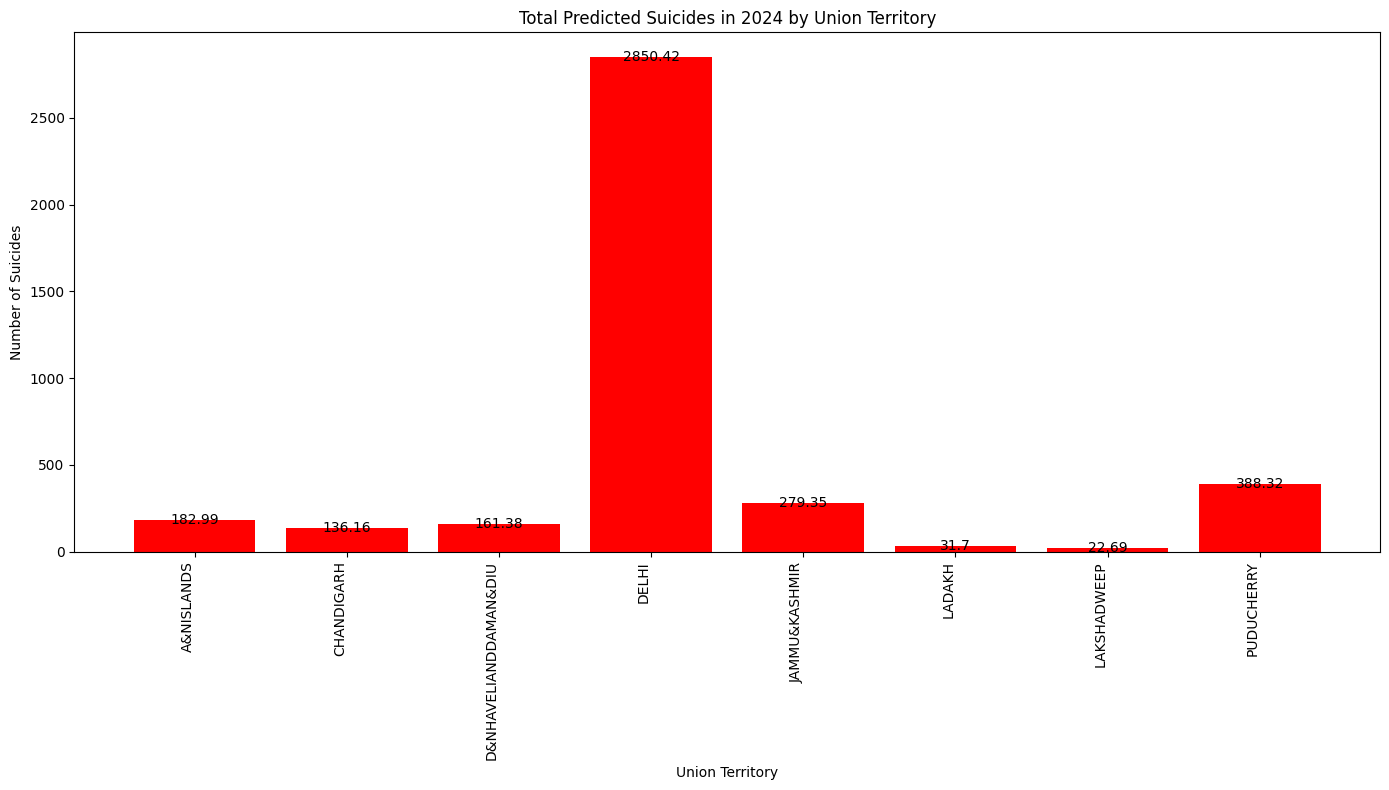

In [ ]:
import matplotlib.pyplot as plt

# "Data is provided manually because predicted values are not included in the dataset table; errors in the graph code may occur as a result."
ut_data = {
    'Union Territory': ['A&NISLANDS', 'CHANDIGARH', 'D&NHAVELIANDDAMAN&DIU', 'DELHI', 'JAMMU&KASHMIR', 'LADAKH', 'LAKSHADWEEP', 'PUDUCHERRY'],
    '2024 Predicted': [182.989768, 136.161157, 161.376563, 2850.419494, 279.34864, 31.697332, 22.69183, 388.315216]
}

# Create DataFrame
ut_df = pd.DataFrame(ut_data)

# Plotting the bar graph
plt.figure(figsize=(14, 8))
bars_ut = plt.bar(ut_df['Union Territory'], ut_df['2024 Predicted'], color='red')  # Change the color to red
plt.title('Total Predicted Suicides in 2024 by Union Territory')
plt.xlabel('Union Territory')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90, ha='right')  # Rotate UT names for better visibility

# Adding numbers inside the bars horizontally
for bar_ut in bars_ut:
    xval_ut = bar_ut.get_x() + bar_ut.get_width() / 2
    yval_ut = bar_ut.get_height()
    plt.text(xval_ut, yval_ut, str(round(yval_ut, 2)), ha='center', va='center')

plt.tight_layout()
plt.show()


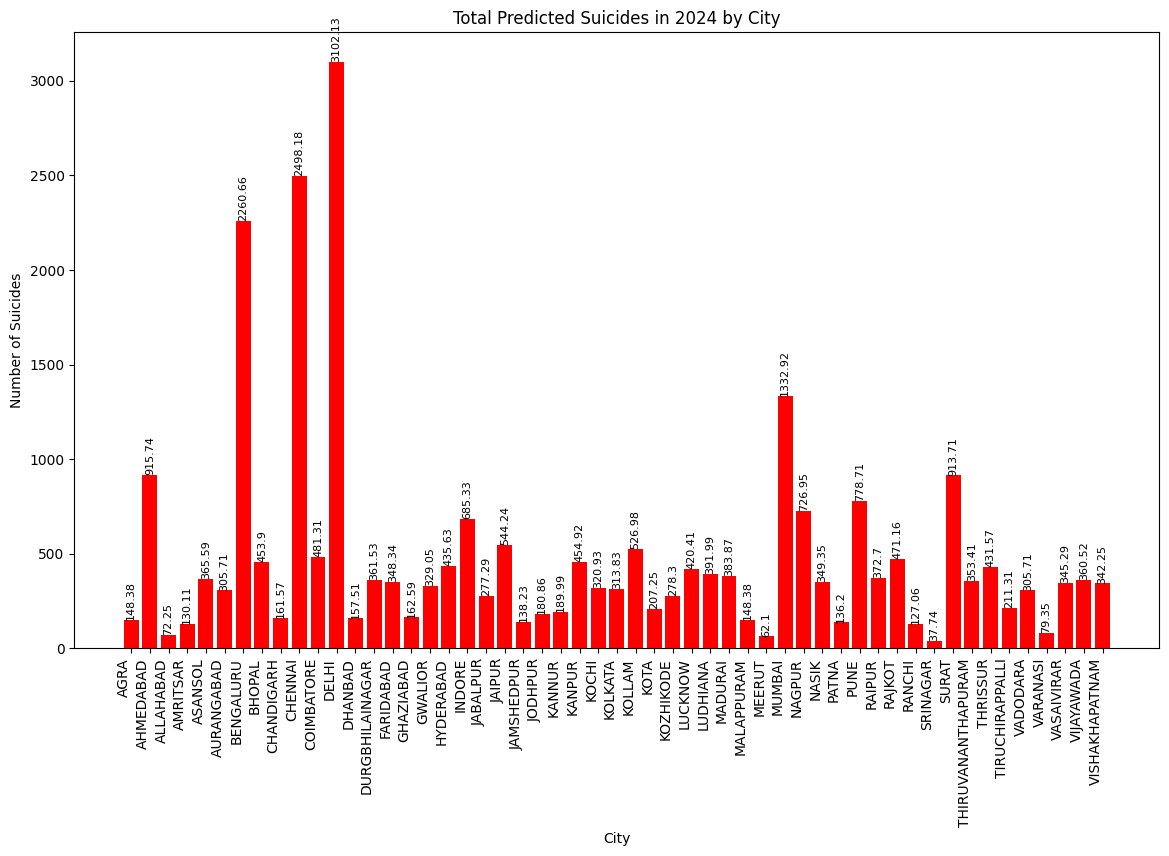

In [ ]:
# Bar graph for total predicted suicides in 2024 by City
plt.figure(figsize=(14, 8))

# Remove "(CITY)" from the city names
city_predictions['City'] = city_predictions['City'].str.replace(r'\(.*\)', '', regex=True)

# Plotting the bar graph
bars_city = plt.bar(city_predictions['City'], city_predictions['2024 Predicted'], color='red')  # Change the color to red
plt.title('Total Predicted Suicides in 2024 by City')
plt.xlabel('City')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90, ha='right')  # Rotate city names for better visibility

# Adding numbers inside the bars vertically
for bar_city in bars_city:
    xval_city = bar_city.get_x() + bar_city.get_width() / 2
    yval_city = bar_city.get_height()
    plt.text(xval_city, yval_city, str(round(yval_city, 2)), ha='center', va='bottom', rotation=90, fontsize=8)

plt.show()


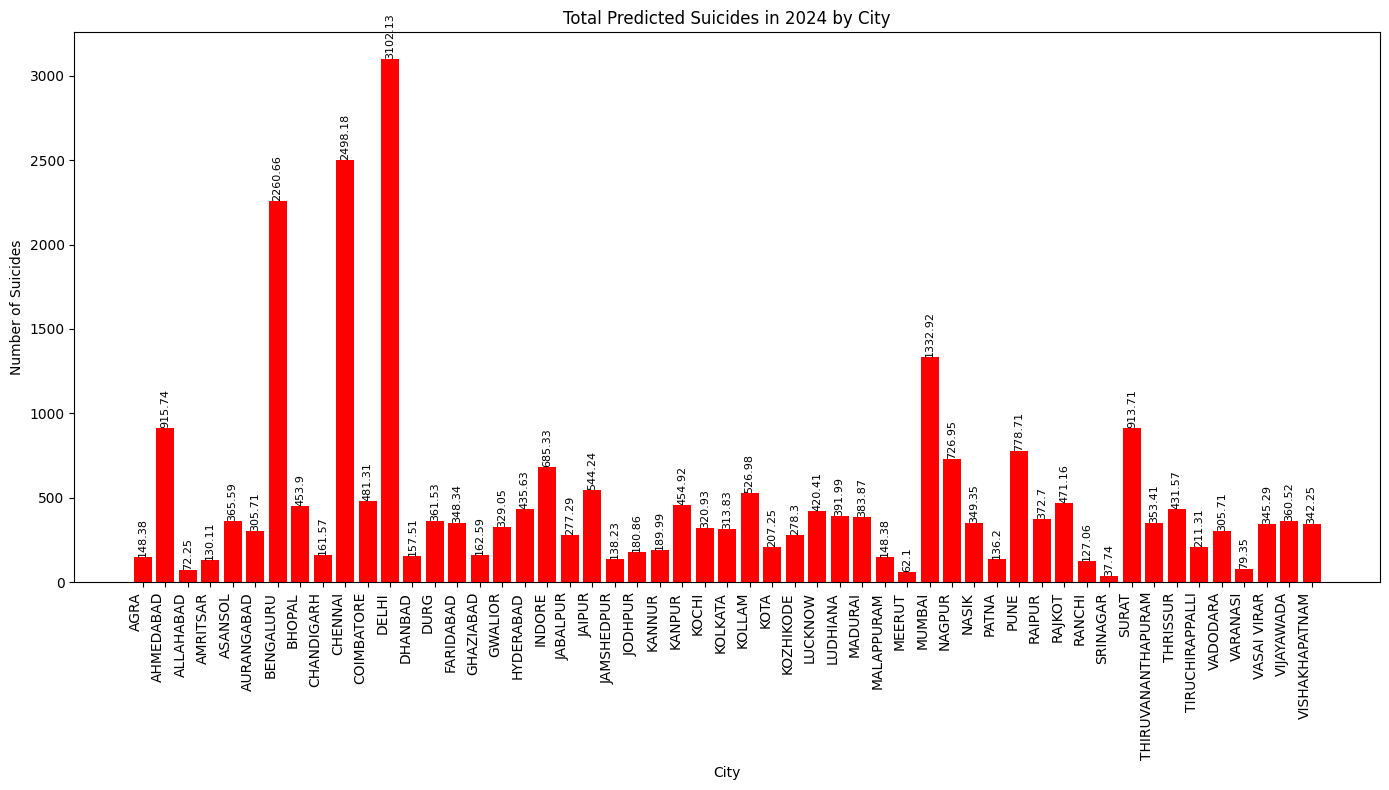

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# "Data is provided manually because predicted values are not included in the dataset table; errors in the graph code may occur as a result."
city_data = {
    'City': ['AGRA', 'AHMEDABAD', 'ALLAHABAD', 'AMRITSAR', 'ASANSOL', 'AURANGABAD', 'BENGALURU', 'BHOPAL', 'CHANDIGARH', 'CHENNAI', 'COIMBATORE', 'DELHI', 'DHANBAD', 'DURG', 'FARIDABAD', 'GHAZIABAD', 'GWALIOR', 'HYDERABAD', 'INDORE', 'JABALPUR', 'JAIPUR', 'JAMSHEDPUR', 'JODHPUR', 'KANNUR', 'KANPUR', 'KOCHI', 'KOLKATA', 'KOLLAM', 'KOTA', 'KOZHIKODE', 'LUCKNOW', 'LUDHIANA', 'MADURAI', 'MALAPPURAM', 'MEERUT', 'MUMBAI', 'NAGPUR', 'NASIK', 'PATNA', 'PUNE', 'RAIPUR', 'RAJKOT', 'RANCHI', 'SRINAGAR', 'SURAT', 'THIRUVANANTHAPURAM', 'THRISSUR', 'TIRUCHIRAPPALLI', 'VADODARA', 'VARANASI', 'VASAI VIRAR', 'VIJAYAWADA', 'VISHAKHAPATNAM'],
    '2024 Predicted': [148.377153, 915.743157, 72.249573, 130.106534, 365.594514, 305.707485, 2260.663733, 453.902507, 161.5726, 2498.181781, 481.308435, 3102.127247, 157.512463, 361.534376, 348.338929, 162.587635, 329.053276, 435.631887, 685.330349, 277.286521, 544.240568, 138.226809, 180.858254, 189.993563, 454.917541, 320.933001, 313.82776, 526.984983, 207.249148, 278.301556, 420.406371, 391.985408, 383.865133, 148.377153, 62.099229, 1332.922294, 726.946759, 349.353964, 136.19674, 778.713513, 372.699755, 471.158091, 127.061431, 37.738404, 913.713088, 353.414101, 431.57175, 211.309286, 305.707485, 79.354814, 345.293826, 360.519342, 342.248723]
}

# Create DataFrame
city_df = pd.DataFrame(city_data)

# Plotting the bar graph
plt.figure(figsize=(14, 8))
bars_city = plt.bar(city_df['City'], city_df['2024 Predicted'], color='red')  # Change the color to red
plt.title('Total Predicted Suicides in 2024 by City')
plt.xlabel('City')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90, ha='right')  # Rotate city names for better visibility

# Adding numbers inside the bars vertically
for bar_city in bars_city:
    xval_city = bar_city.get_x() + bar_city.get_width() / 2
    yval_city = bar_city.get_height()
    plt.text(xval_city, yval_city, str(round(yval_city, 2)), ha='center', va='bottom', rotation=90, fontsize=8)

plt.tight_layout()
plt.show()


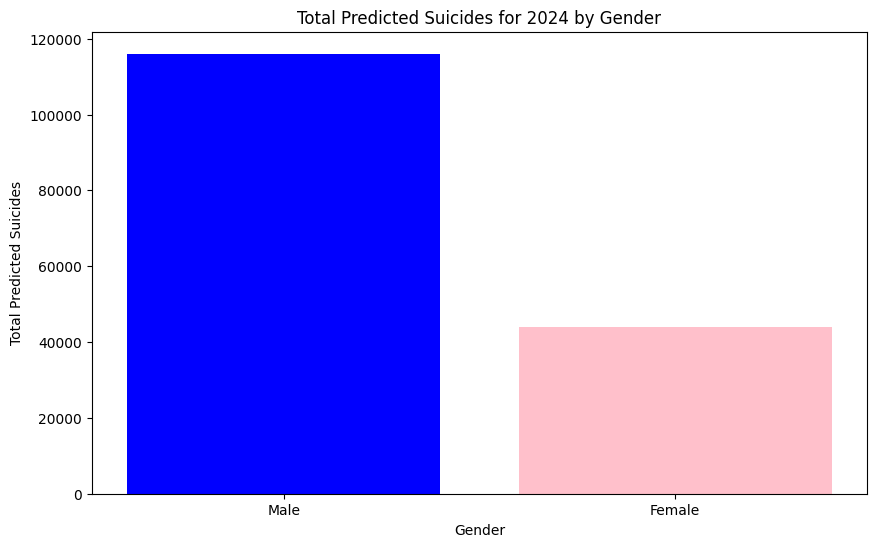

Total Predicted Male Suicides: 116028
Total Predicted Female Suicides: 43926


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("state.csv")

# Calculate total predicted male and female suicides for each state
data['Total Predicted Suicides'] = data['Male'] + data['Female']

# Calculate total predicted male and female suicides across all states
total_male_suicides = data['Male'].sum()
total_female_suicides = data['Female'].sum()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(['Male', 'Female'], [total_male_suicides, total_female_suicides], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Total Predicted Suicides')
plt.title('Total Predicted Suicides for 2024 by Gender')
plt.show()

# Print the total predicted male and female suicides
print("Total Predicted Male Suicides:", total_male_suicides)
print("Total Predicted Female Suicides:", total_female_suicides)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("state.csv")

# Calculate total predicted male and female suicides for each state
data['Total Predicted Suicides'] = data['Male'] + data['Female']

# Calculate total predicted male and female suicides across all states
total_male_suicides = data['Male'].sum()
total_female_suicides = data['Female'].sum()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(['Male', 'Female'], [total_male_suicides, total_female_suicides], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Total Predicted Suicides')
plt.title('Total Predicted Suicides for 2024 by Gender')
plt.show()

# Print the total predicted male and female suicides
print("Total Predicted Male Suicides:", total_male_suicides)
print("Total Predicted Female Suicides:", total_female_suicides)